In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA','BsmtFinType1':'NA',
                  'BsmtFinType2':'NA','FireplaceQu':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                  'GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA','Exterior2nd':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)

In [3]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 259
MasVnrType 8
MasVnrArea 8
Electrical 1
GarageYrBlt 81


In [4]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [5]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data.loc[:, train_data.columns != 'SalePrice'], train_data['SalePrice'],random_state=21,train_size=0.8)
training= pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_valid, y_valid], axis=1)

In [7]:
Sale_type_common=training.groupby(['Neighborhood'])['SaleType'].agg(pd.Series.mode).reset_index()
def fill_sale_type(df):
    merged_df = pd.merge(df, Sale_type_common, how='left', on=['Neighborhood'])
    merged_df['SaleType_x']=merged_df.apply(lambda row: row['SaleType_y'] if pd.isnull(row['SaleType_x']) else row['SaleType_x'], axis=1)
    merged_df.drop('SaleType_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'SaleType_x': 'SaleType'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
MSZoning_common=training.groupby(['Neighborhood'])['MSZoning'].agg(pd.Series.mode).reset_index()
def fill_MS_Zoning(df):
    merged_df = pd.merge(df, MSZoning_common, how='left', on=['Neighborhood'])
    merged_df['MSZoning_x']=merged_df.apply(lambda row: row['MSZoning_y'] if pd.isnull(row['MSZoning_x']) else row['MSZoning_x'], axis=1)
    merged_df.drop('MSZoning_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'MSZoning_x': 'MSZoning'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
lot_frontage_common=training.groupby(['Neighborhood'])['LotFrontage'].median().reset_index()
def fill_lot_frontage(df):
    merged_df = pd.merge(df, lot_frontage_common, how='left', on=['Neighborhood'])
    merged_df['LotFrontage_x']=merged_df.apply(lambda row: row['LotFrontage_y'] if pd.isnull(row['LotFrontage_x']) else row['LotFrontage_x'], axis=1)
    merged_df.drop('LotFrontage_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'LotFrontage_x': 'LotFrontage'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
GarageYrBlt_common=training.groupby(['Neighborhood','GarageType'])['GarageYrBlt'].median().round().reset_index()
def fill_GarageYrBlt(df):
    merged_df = pd.merge(df, GarageYrBlt_common, how='left', on=['Neighborhood','GarageType'])
    merged_df['GarageYrBlt_x']=merged_df.apply(lambda row: row['GarageYrBlt_y'] if pd.isnull(row['GarageYrBlt_x']) else row['GarageYrBlt_x'], axis=1)
    merged_df.drop('GarageYrBlt_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'GarageYrBlt_x': 'GarageYrBlt'})
    merged_df.set_index(df.index, inplace=True)
    merged_df['GarageYrBlt']=merged_df['GarageYrBlt'].fillna(0)
    return merged_df
def finalize_convert(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallQual'] = df['OverallQual'].astype(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['YearRemodAdd']=df['YearRemodAdd'].astype(str)
    df['YearBuilt']=df['YearBuilt'].astype(str)
    df['GarageYrBlt']=df['GarageYrBlt'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    return df
common_electrical=training['Electrical'].mode()[0]
common_masvnrtype=training['MasVnrType'].mode()[0]
common_exterior_1=training['Exterior1st'].mode()[0]
common_exterior_2=training['Exterior2nd'].mode()[0]

In [8]:
# fill null values
training=fill_sale_type(training)
training=fill_MS_Zoning(training)
training=fill_lot_frontage(training)
training.drop('Utilities', axis=1, inplace=True)
training['Electrical']=training['Electrical'].fillna(common_electrical)
training['MasVnrType']=training['MasVnrType'].fillna(common_masvnrtype)
training['MasVnrArea']=training['MasVnrArea'].fillna(0)
training['Functional']=training['Functional'].fillna('Typ')
training=fill_GarageYrBlt(training)
training['Exterior1st']=training['Exterior1st'].fillna(common_exterior_1)
training['Exterior2nd']=training['Exterior2nd'].fillna(common_exterior_2)
training['BsmtFinSF1']=training.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
training['BsmtFinSF2']=training.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
training['BsmtUnfSF']=training.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
training['TotalBsmtSF']=training.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
training['BsmtFullBath']=training['BsmtFullBath'].fillna(0)
training['BsmtHalfBath']=training['BsmtHalfBath'].fillna(0)
training['KitchenQual']=training['KitchenQual'].fillna('TA')
training['GarageArea']=training['GarageArea'].fillna(0)
training['GarageCars']=training['GarageCars'].fillna(0)
#training['GarageYrBlt'] = training.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
validation=fill_sale_type(validation)
validation=fill_MS_Zoning(validation)
validation=fill_lot_frontage(validation)
validation.drop('Utilities', axis=1, inplace=True)
validation['Electrical']=validation['Electrical'].fillna(common_electrical)
validation['MasVnrType']=validation['MasVnrType'].fillna(common_masvnrtype)
validation['MasVnrArea']=validation['MasVnrArea'].fillna(0)
validation['Functional']=validation['Functional'].fillna('Typ')
validation=fill_GarageYrBlt(validation)
validation['Exterior1st']=validation['Exterior1st'].fillna(common_exterior_1)
validation['Exterior2nd']=validation['Exterior2nd'].fillna(common_exterior_2)
validation['BsmtFinSF1']=validation.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
validation['BsmtFinSF2']=validation.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
validation['BsmtUnfSF']=validation.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
validation['TotalBsmtSF']=validation.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
validation['BsmtFullBath']=validation['BsmtFullBath'].fillna(0)
validation['BsmtHalfBath']=validation['BsmtHalfBath'].fillna(0)
validation['KitchenQual']=validation['KitchenQual'].fillna('TA')
validation['GarageArea']=validation['GarageArea'].fillna(0)
validation['GarageCars']=validation['GarageCars'].fillna(0)
#validation['GarageYrBlt'] = validation.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
test_data=fill_sale_type(test_data)
test_data=fill_MS_Zoning(test_data)
test_data=fill_lot_frontage(test_data)
test_data.drop('Utilities', axis=1, inplace=True)
test_data['Electrical']=test_data['Electrical'].fillna(common_electrical)
test_data['MasVnrType']=test_data['MasVnrType'].fillna(common_masvnrtype)
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)
test_data['Functional']=test_data['Functional'].fillna('Typ')
test_data=fill_GarageYrBlt(test_data)
test_data['Exterior1st']=test_data['Exterior1st'].fillna(common_exterior_1)
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(common_exterior_2)
test_data['BsmtFinSF1']=test_data.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
test_data['BsmtFinSF2']=test_data.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
test_data['BsmtUnfSF']=test_data.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
test_data['TotalBsmtSF']=test_data.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0)
test_data['KitchenQual']=test_data['KitchenQual'].fillna('TA')
test_data['GarageArea']=test_data['GarageArea'].fillna(0)
test_data['GarageCars']=test_data['GarageCars'].fillna(0)

In [9]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [10]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [11]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [12]:
training=finalize_convert(training)
validation=finalize_convert(validation)
test_data=finalize_convert(test_data)

In [13]:
def get_cat_num_features(df):
    num_features = []
    cat_features = []
    for col in df.columns:
        if df[col].dtype=="float64" or df[col].dtype=="int64":
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features

In [14]:
def create_new_features(df):
    df['TotalSF']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
    df['Bsmt_Baths']=df['BsmtFullBath']+(0.5*df['BsmtHalfBath'])
    df['Total_BathAbvGrd']=df['FullBath']+(0.5*df['HalfBath'])
    df["AvgRoomSize"] = df["GrLivArea"] / (df["TotRmsAbvGrd"]+(0.4*df['Total_BathAbvGrd']))
    df['Total_porch_sf'] = (df['OpenPorchSF']+df['3SsnPorch']+df['EnclosedPorch'] + df['ScreenPorch']+df['WoodDeckSF'])
    df['BedBath']=df['BedroomAbvGr']*df['Total_BathAbvGrd']
    df['TotalLot']=df['LotFrontage']+df['LotArea']
    df['sqft_living']=df['TotalBsmtSF']+df['GrLivArea']
    #df=df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','WoodDeckSF','BedroomAbvGr'])
    return df
def set_age(df):
    tem=np.where(df['YrSold'].astype(float)>df['GarageYrBlt'].astype(float),df['YrSold'].astype(float),np.where(df['GarageYrBlt'].astype(float)>df['YearRemodAdd'].astype(float),df['GarageYrBlt'].astype(float),df['YearRemodAdd'].astype(float)))
    df['age']=tem-df['YearBuilt'].astype(float)
    df['age']=df['age'].astype('int64')
    df=df.drop(columns=['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'])
    return df

In [15]:
training=create_new_features(training)
training=set_age(training)
validation=create_new_features(validation)
validation=set_age(validation)
test_data=create_new_features(test_data)
test_data=set_age(test_data)
num_feat,cat_feat=get_cat_num_features(training.loc[:,training.columns!='SalePrice'])
num_feat

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotalSF',
 'Total_Bathrooms',
 'Bsmt_Baths',
 'Total_BathAbvGrd',
 'AvgRoomSize',
 'Total_porch_sf',
 'BedBath',
 'TotalLot',
 'sqft_living',
 'age']

In [16]:
#ordinal categories
od_num=['OverallQual','OverallCond','MoSold']
od_cat=['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond',
    'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','Functional',
    'FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC']
bc=['CentralAir']
#nominal categories
nc=['MSSubClass','MSZoning','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','Fence','MiscFeature',
    'SaleType','SaleCondition']
def format_table(train,valid,test):
    data= pd.concat([train,valid,test], axis=0)
    electical_map = {'Y': 1, 'N': 0}
    data[bc[0]]=data[bc[0]].map(electical_map)
    data=pd.get_dummies(data,columns=nc)
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode_data(train,valid,test):
    data= pd.concat([train,valid,test], axis=0)
    data[od_num]=data[od_num].astype(int)
    data[od_cat]=data[od_cat].apply(le.fit_transform)
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test.drop('SalePrice',axis=1)
training,validation,test_data=format_table(training,validation,test_data)
training,validation,test_data=encode_data(training,validation,test_data)

training.reset_index().to_csv('training_eda.csv',index=False)
validation.reset_index().to_csv('validation_eda.csv',index=False)
test_data.reset_index().to_csv('test_eda.csv',index=False)

Skewness: 2.5085808812597685
count    1168.000000
mean       70.660103
std        22.937530
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


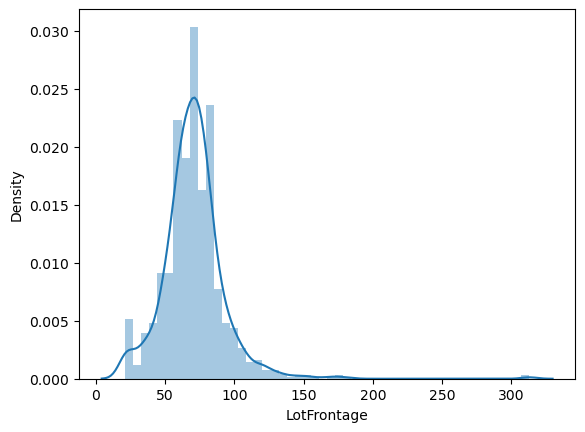

Skewness: 11.794866598454751
count      1168.000000
mean      10725.271404
std       10809.634826
min        1300.000000
25%        7560.000000
50%        9565.500000
75%       11695.500000
max      215245.000000
Name: LotArea, dtype: float64


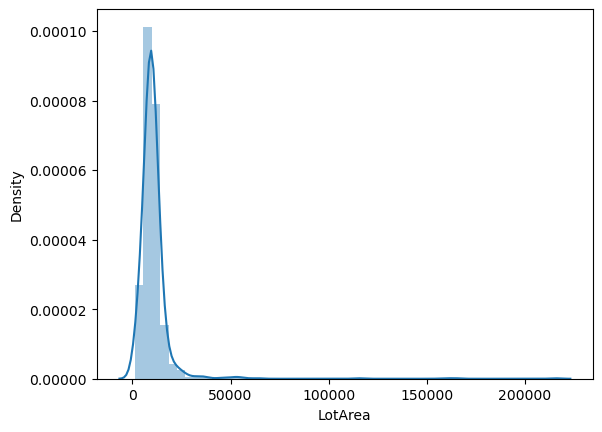

Skewness: 2.6836248766270177
count    1168.000000
mean      106.287671
std       183.167254
min         0.000000
25%         0.000000
50%         0.000000
75%       169.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


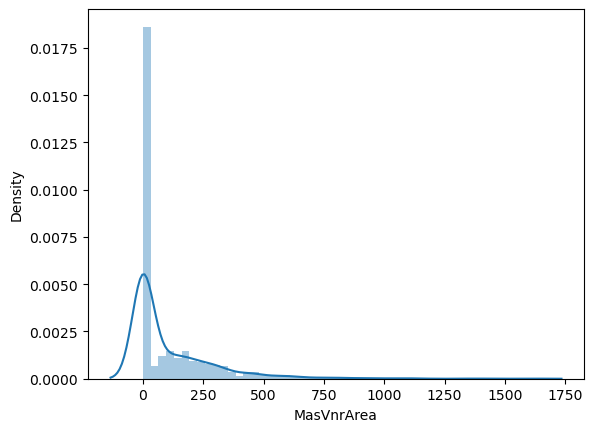

Skewness: 1.8642811218472237
count    1168.000000
mean      444.230308
std       458.718993
min         0.000000
25%         0.000000
50%       384.000000
75%       716.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


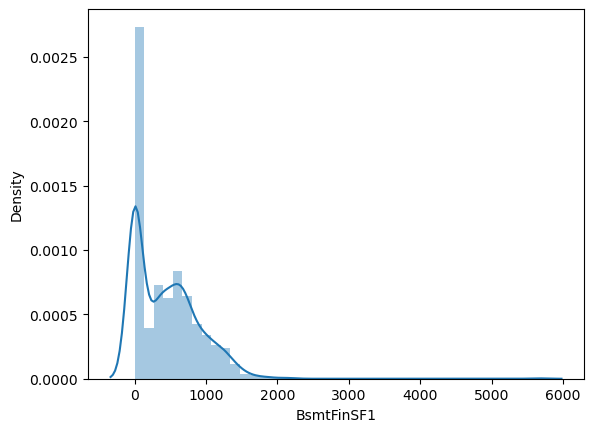

Skewness: 4.50030451064517
count    1168.000000
mean       44.134418
std       160.708430
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


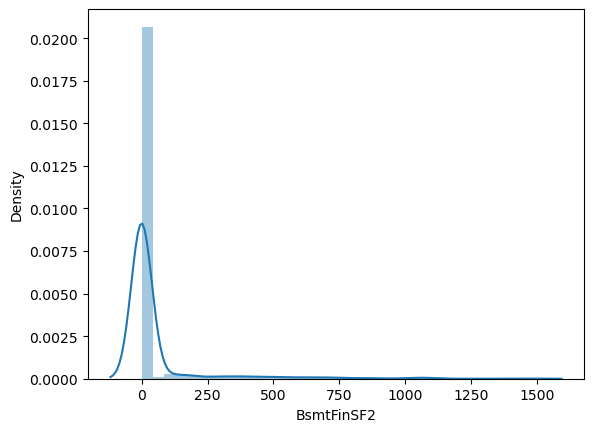

Skewness: 0.8693187028207706
count    1168.000000
mean      569.309075
std       441.819995
min         0.000000
25%       228.000000
50%       480.500000
75%       813.250000
max      2153.000000
Name: BsmtUnfSF, dtype: float64


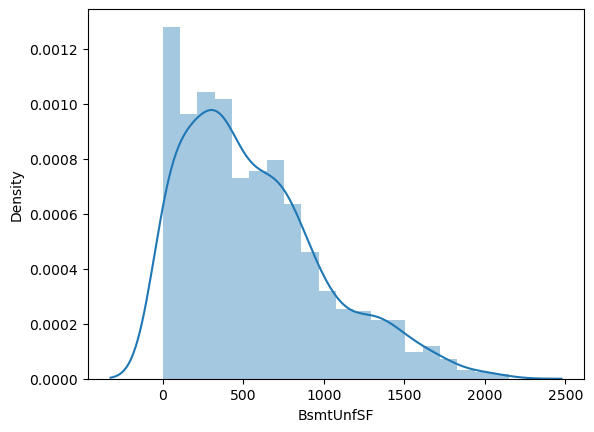

Skewness: 1.6425187840902926
count    1168.000000
mean     1057.673801
std       434.996954
min         0.000000
25%       803.000000
50%      1002.500000
75%      1302.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


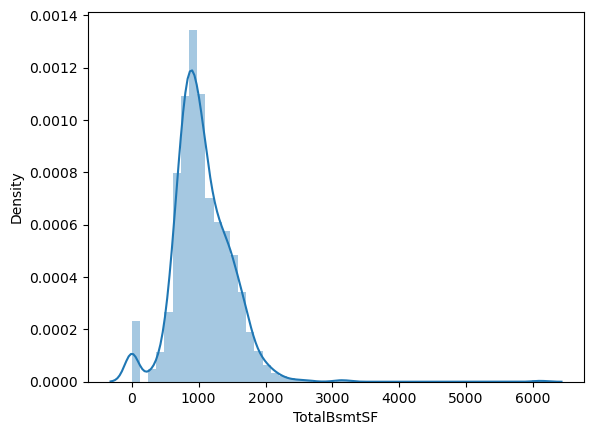

Skewness: 1.46531215445093
count    1168.000000
mean     1165.815925
std       380.498326
min       334.000000
25%       893.750000
50%      1088.000000
75%      1392.500000
max      4692.000000
Name: 1stFlrSF, dtype: float64


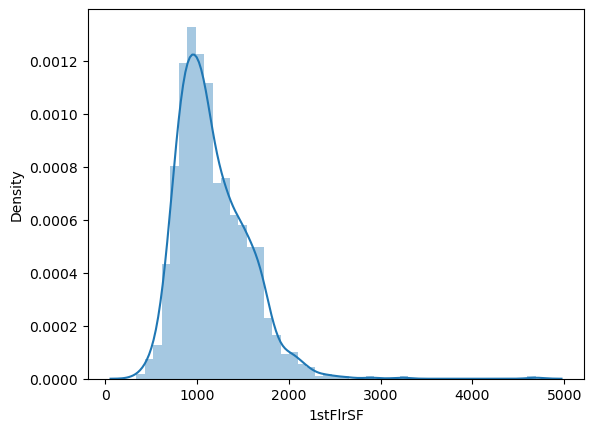

Skewness: 0.8202647316981831
count    1168.000000
mean      347.656678
std       440.278532
min         0.000000
25%         0.000000
50%         0.000000
75%       730.500000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


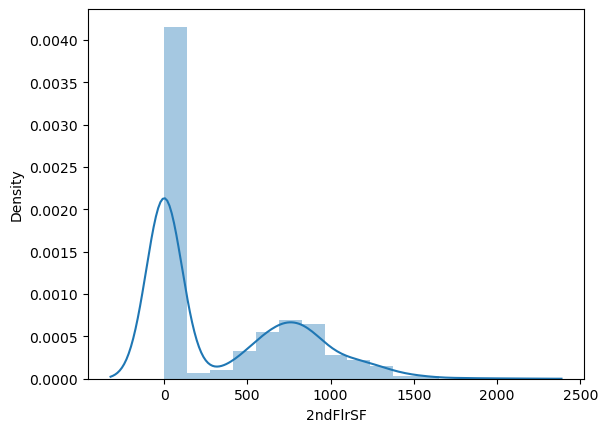

Skewness: 8.87844804992994
count    1168.000000
mean        6.035959
std        49.444909
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


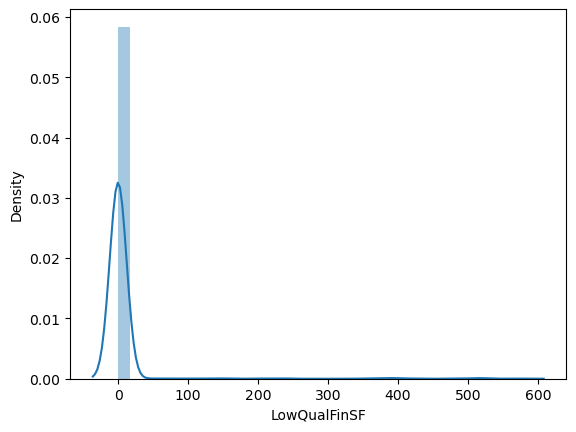

Skewness: 1.2972340089108914
count    1168.000000
mean     1519.508562
std       523.176764
min       334.000000
25%      1130.750000
50%      1470.500000
75%      1786.000000
max      5642.000000
Name: GrLivArea, dtype: float64


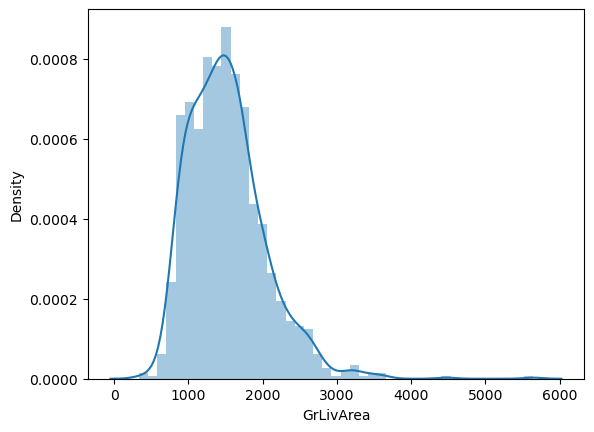

Skewness: 0.656999348472453
count    1168.000000
mean        0.422089
std         0.522756
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


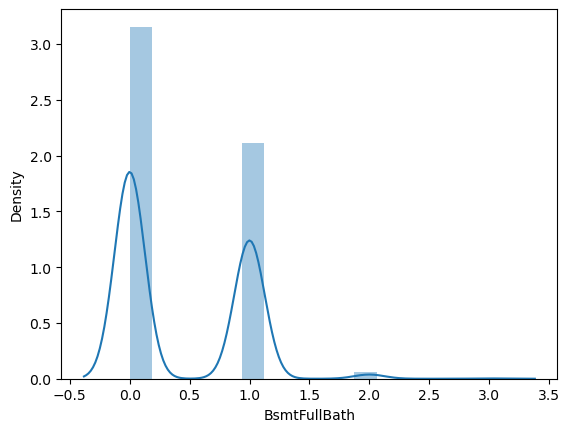

Skewness: 4.221626742200592
count    1168.000000
mean        0.056507
std         0.238300
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


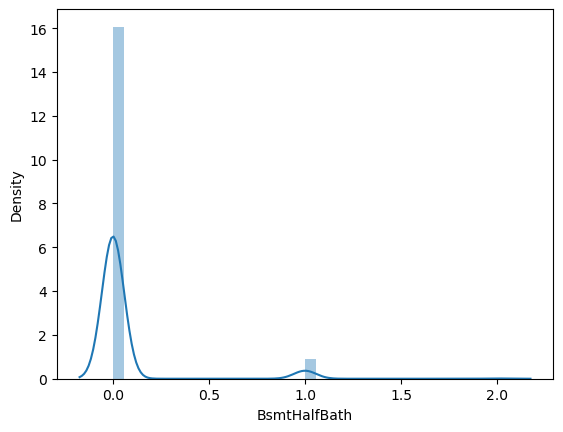

Skewness: -0.017019279798942147
count    1168.000000
mean        1.562500
std         0.550327
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


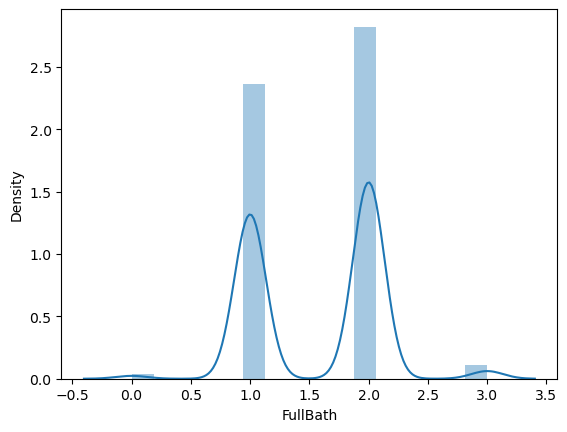

Skewness: 0.7232434717971986
count    1168.000000
mean        0.381849
std         0.506762
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


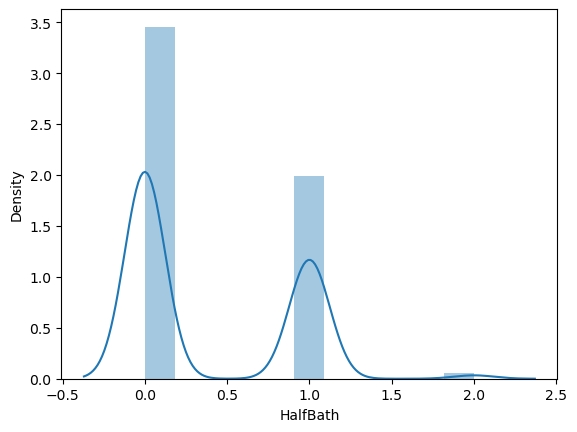

Skewness: 0.25524414486081315
count    1168.000000
mean        2.865582
std         0.829974
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


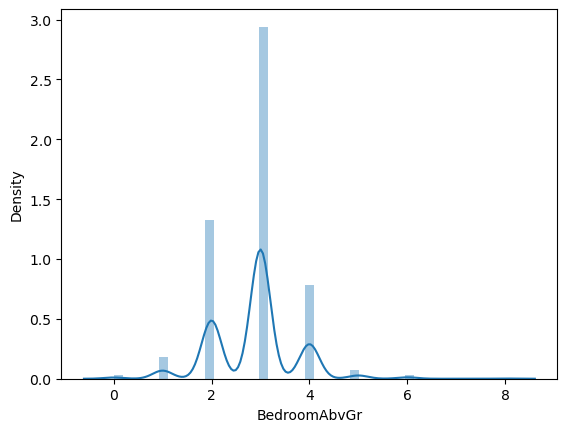

Skewness: 4.350761455018229
count    1168.000000
mean        1.049658
std         0.228853
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


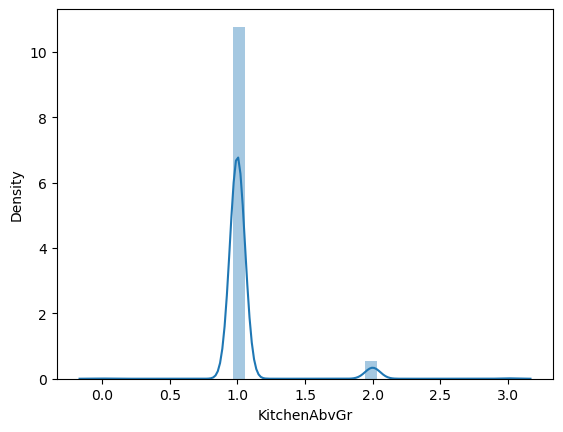

Skewness: 0.6524162029006894
count    1168.000000
mean        6.549658
std         1.634336
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


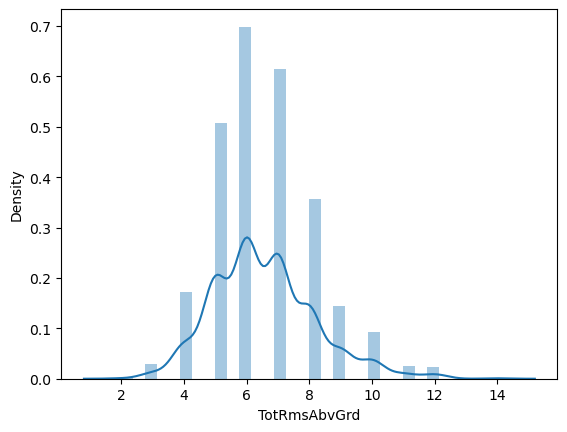

Skewness: 0.5830561836069049
count    1168.000000
mean        0.614726
std         0.636391
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


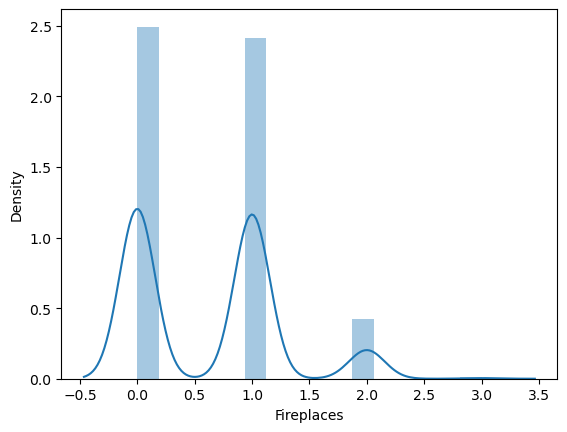

Skewness: -0.3616135551559263
count    1168.000000
mean        1.773116
std         0.752531
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


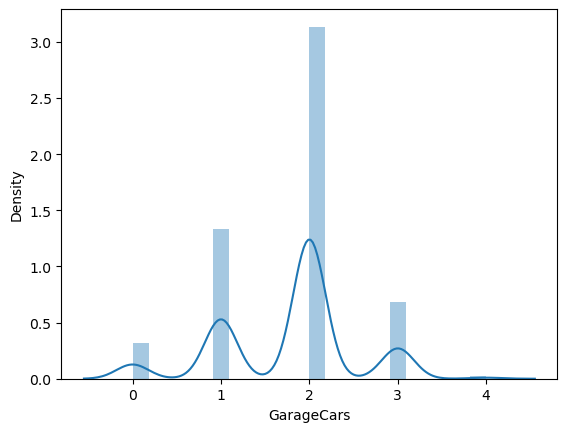

Skewness: 0.18878803980641282
count    1168.000000
mean      473.757705
std       216.084302
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


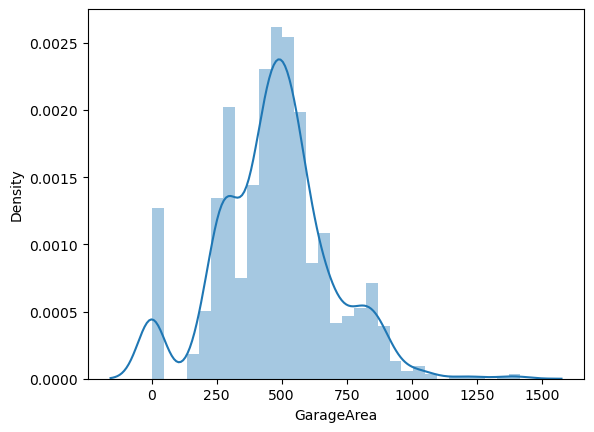

Skewness: 1.5727546647403368
count    1168.000000
mean       94.396404
std       125.868811
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


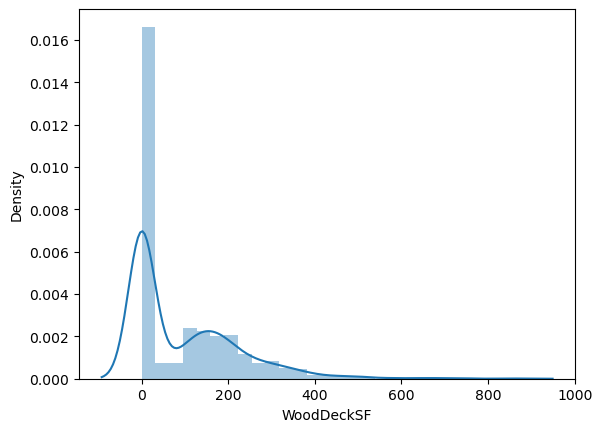

Skewness: 2.2407024465048253
count    1168.000000
mean       46.705479
std        65.580257
min         0.000000
25%         0.000000
50%        24.500000
75%        68.250000
max       523.000000
Name: OpenPorchSF, dtype: float64


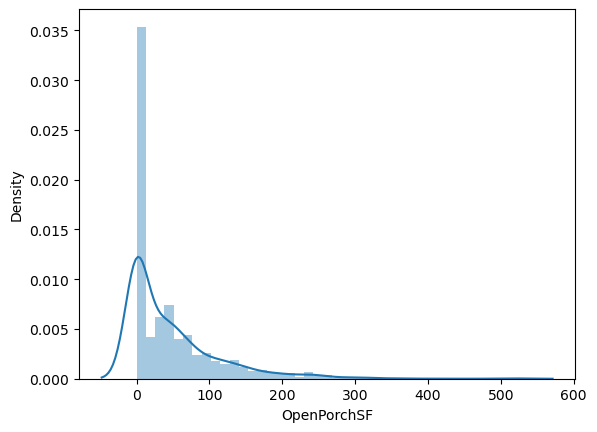

Skewness: 3.1467105194492886
count    1168.000000
mean       22.260274
std        62.275784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


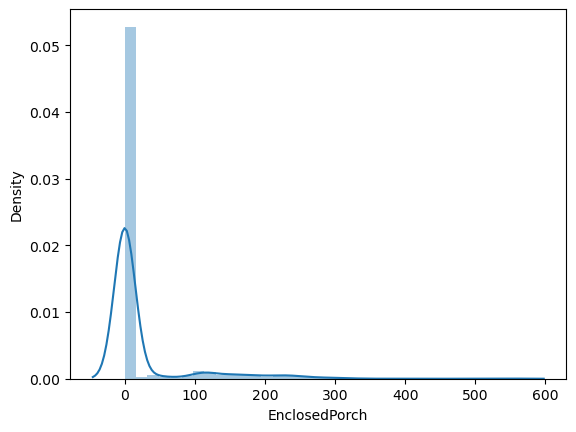

Skewness: 9.656689788584668
count    1168.000000
mean        3.953767
std        31.905139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


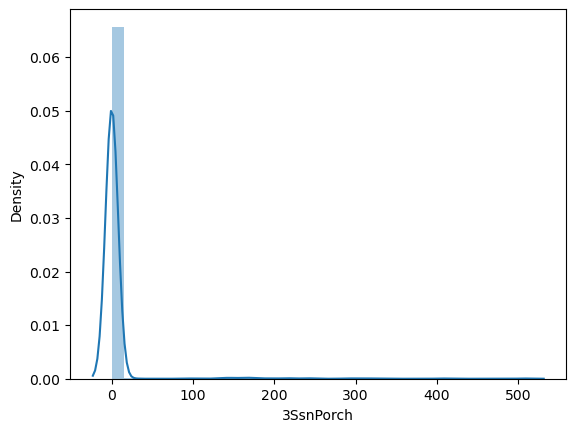

Skewness: 4.148818236004729
count    1168.000000
mean       14.710616
std        55.471186
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       440.000000
Name: ScreenPorch, dtype: float64


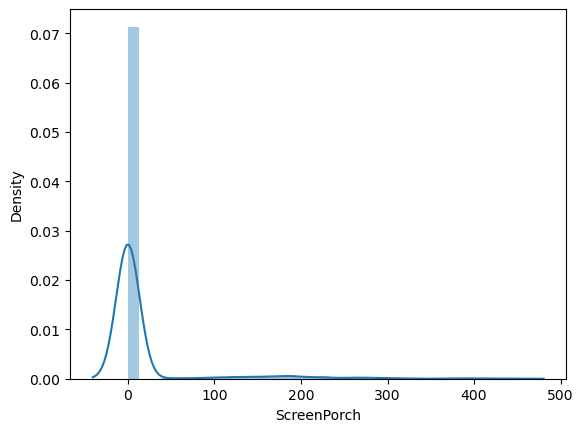

Skewness: 14.371069590694683
count    1168.000000
mean        2.893836
std        40.736249
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


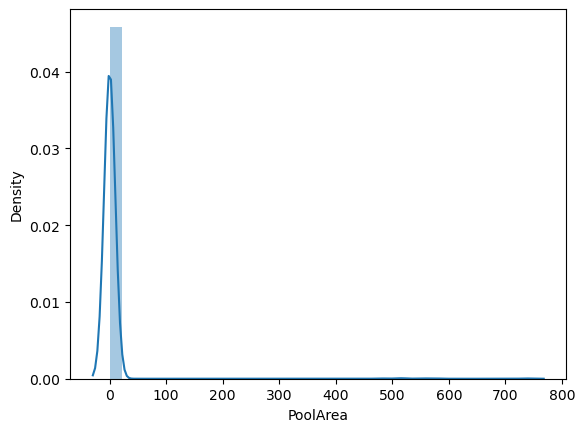

Skewness: 23.201667249229928
count     1168.000000
mean        44.815068
std        542.983929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


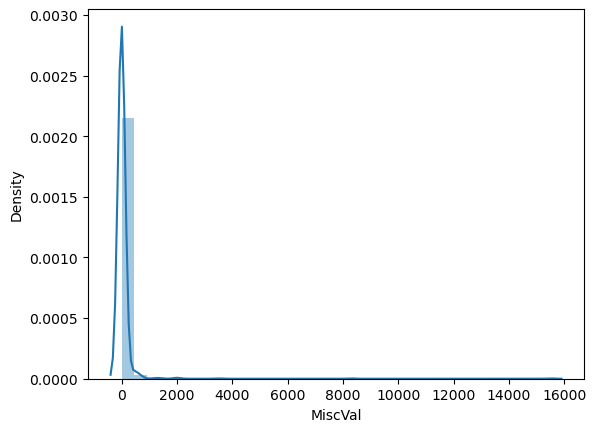

Skewness: 1.8419672630902362
count     1168.000000
mean      2571.146404
std        812.986244
min        334.000000
25%       2014.750000
50%       2484.000000
75%       3006.500000
max      11752.000000
Name: TotalSF, dtype: float64


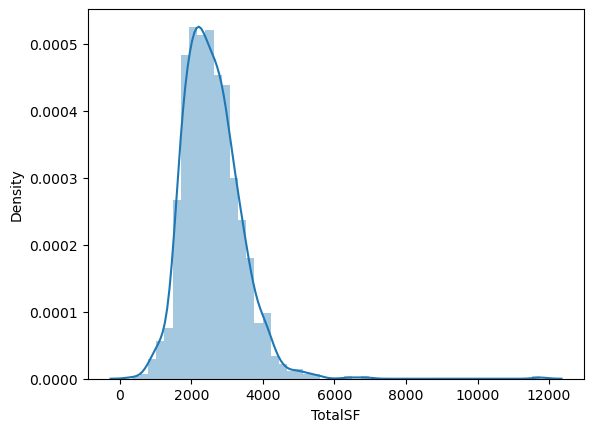

Skewness: 0.29567976497647763
count    1168.000000
mean        2.203767
std         0.791722
min         1.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.000000
Name: Total_Bathrooms, dtype: float64


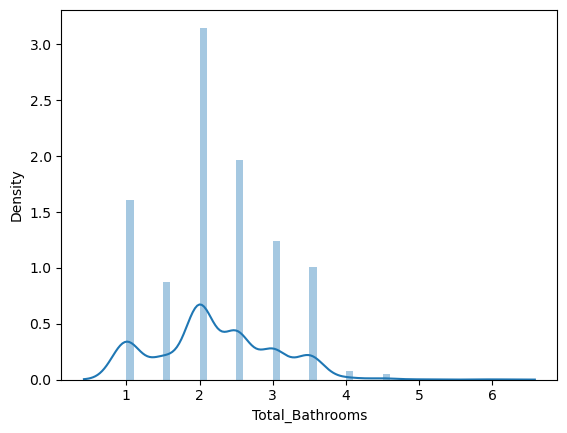

Skewness: 0.5838099251296484
count    1168.000000
mean        0.450342
std         0.520052
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


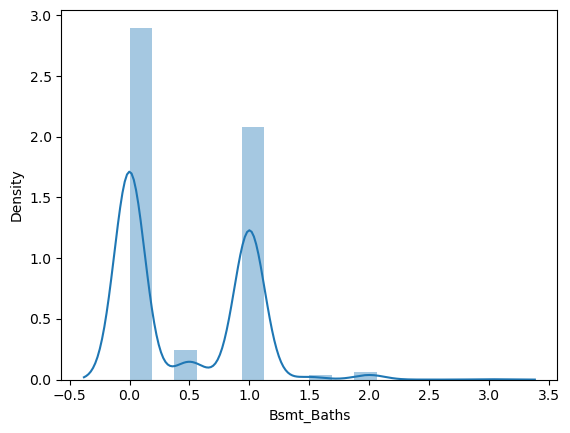

Skewness: 0.1216650011930925
count    1168.000000
mean        1.753425
std         0.638984
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


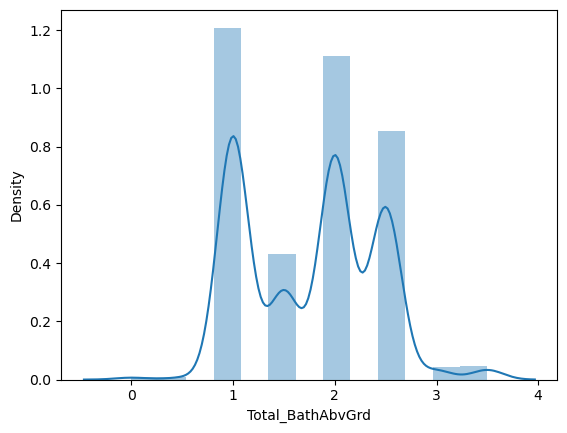

Skewness: 0.9216724827318452
count    1168.000000
mean      207.710326
std        37.706589
min       112.037037
25%       181.836124
50%       204.114583
75%       228.277027
max       434.000000
Name: AvgRoomSize, dtype: float64


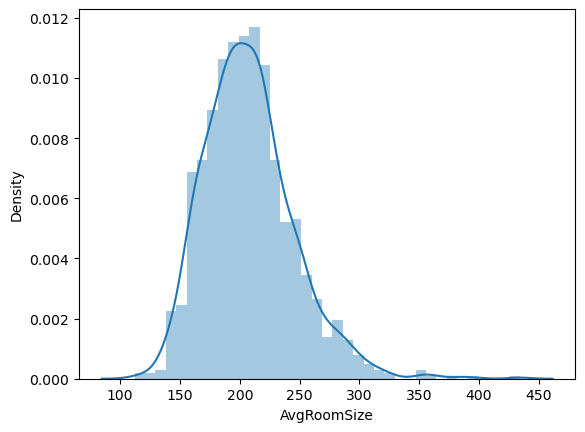

Skewness: 1.0252658853702972
count    1168.000000
mean      182.026541
std       157.283778
min         0.000000
25%        44.000000
50%       164.500000
75%       268.250000
max       929.000000
Name: Total_porch_sf, dtype: float64


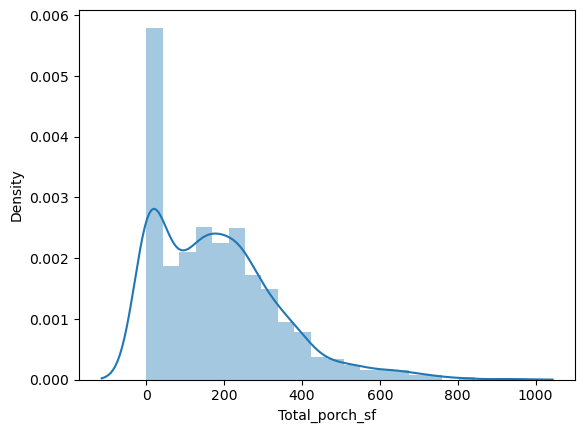

Skewness: 0.7967134745960945
count    1168.000000
mean        5.243579
std         2.822278
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


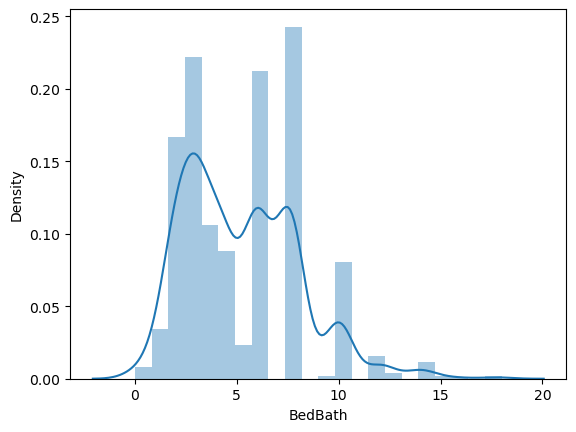

Skewness: 11.77971850192839
count      1168.000000
mean      10795.931507
std       10817.162680
min        1324.000000
25%        7630.000000
50%        9642.500000
75%       11768.250000
max      215395.000000
Name: TotalLot, dtype: float64


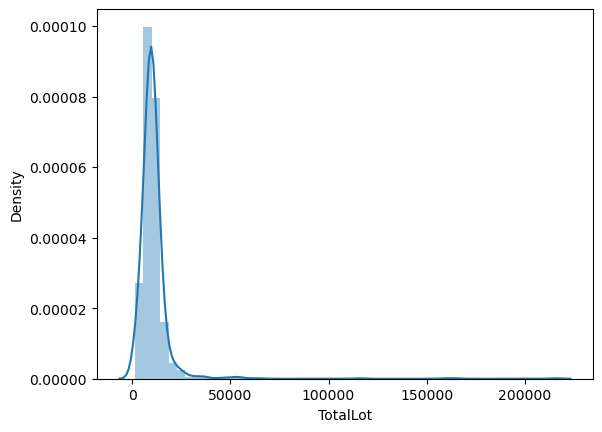

Skewness: 1.8457077303501002
count     1168.000000
mean      2577.182363
std        814.489623
min        334.000000
25%       2016.000000
50%       2485.000000
75%       3013.500000
max      11752.000000
Name: sqft_living, dtype: float64


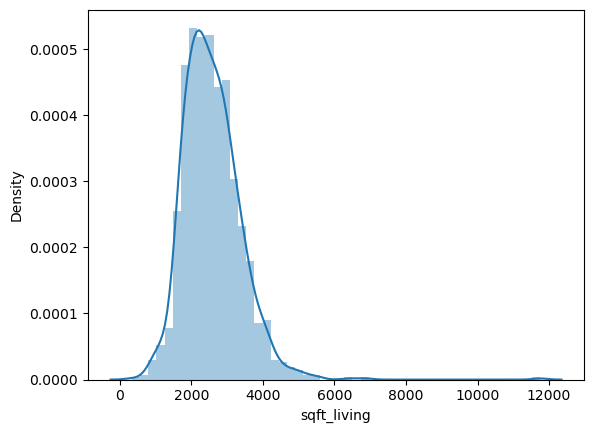

Skewness: 0.6243908725027593
count    1168.000000
mean       36.742295
std        30.542754
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


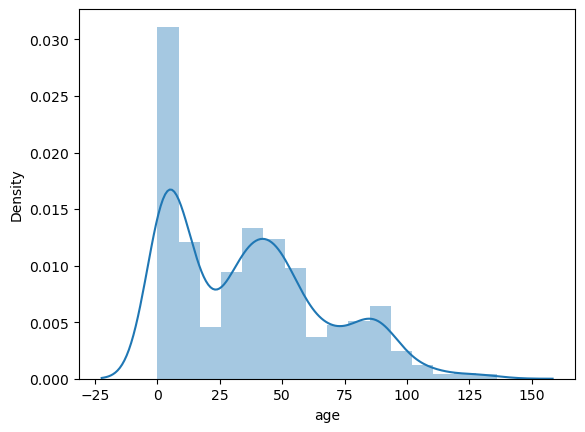

In [17]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

Skewness: 0.16781632213080494
count    1168.000000
mean        6.111301
std         1.374742
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


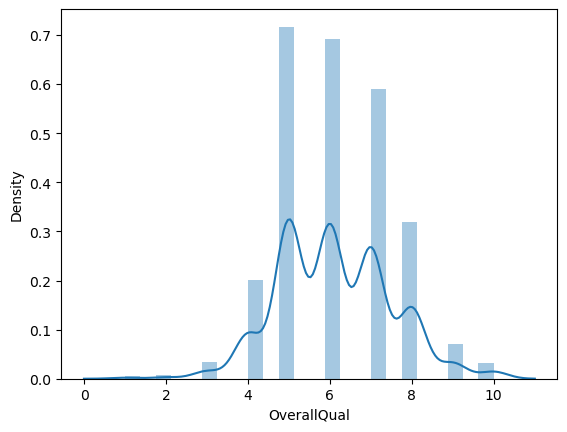

Skewness: 0.709632924338739
count    1168.000000
mean        5.583904
std         1.119959
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


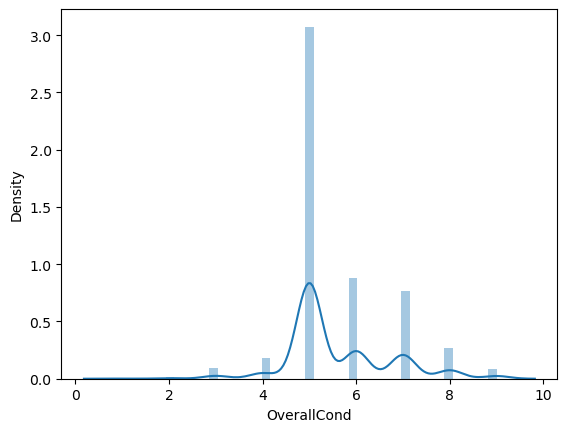

Skewness: 0.2224827223283675
count    1168.000000
mean        6.299658
std         2.666418
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


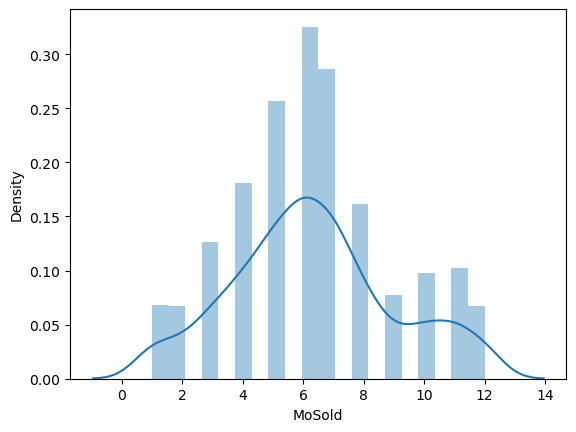

Skewness: -0.5851472189337553
count    1168.000000
mean        1.926370
std         1.411687
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


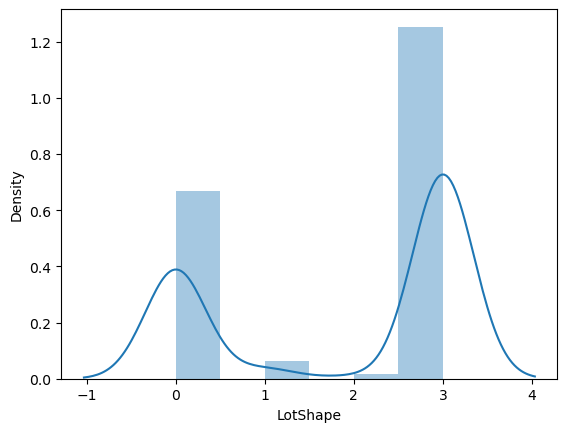

Skewness: -3.0609283844200283
count    1168.000000
mean        2.766267
std         0.721319
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


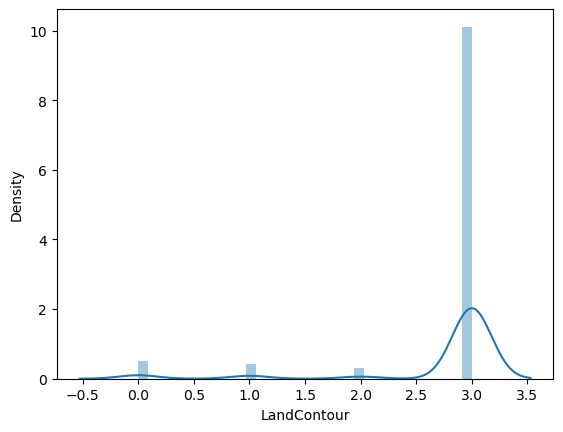

Skewness: 4.777938371393661
count    1168.000000
mean        0.065925
std         0.289673
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


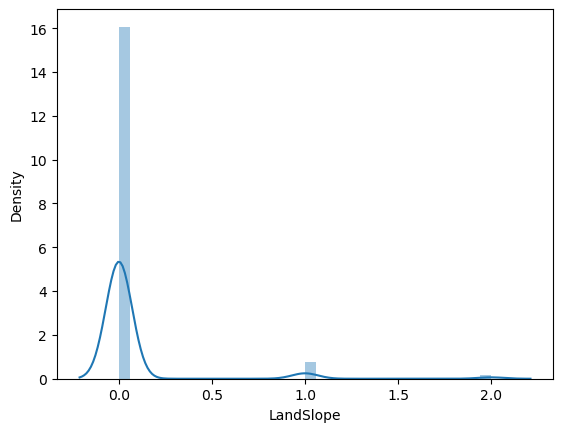

Skewness: -1.767928010896546
count    1168.00000
mean        2.52911
std         0.69087
min         0.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         3.00000
Name: ExterQual, dtype: float64


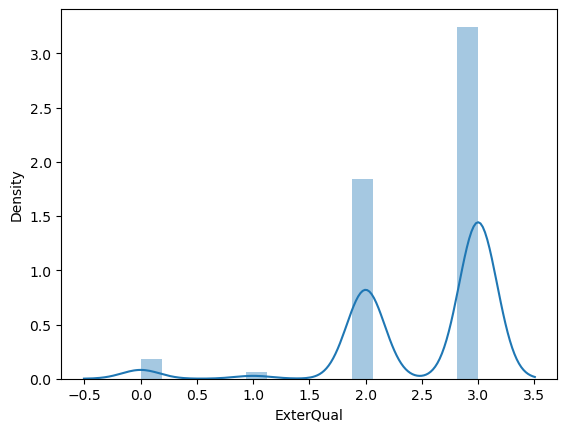

Skewness: -2.4987885429383754
count    1168.000000
mean        3.725171
std         0.741001
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


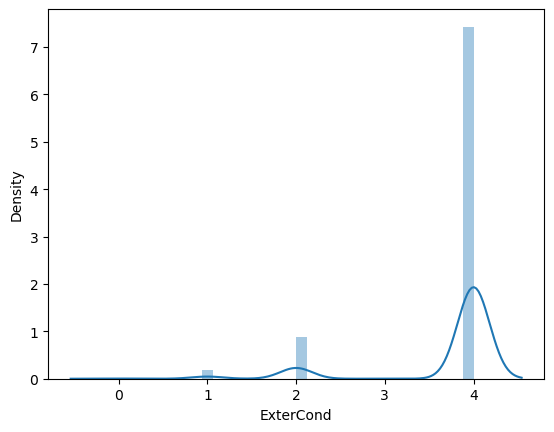

Skewness: -0.4932239330390275
count    1168.000000
mean        2.738870
std         1.262251
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


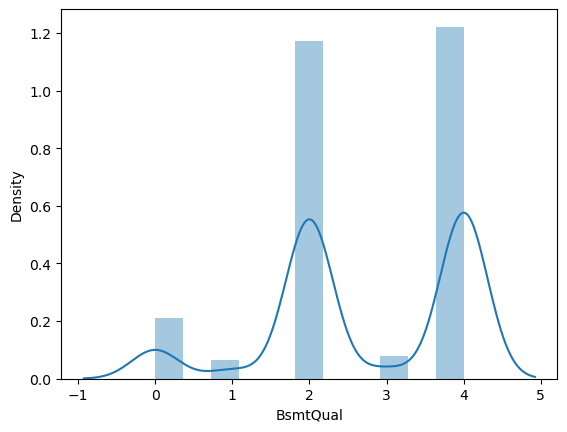

Skewness: -2.9070836360757513
count    1168.000000
mean        3.684075
std         0.959516
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


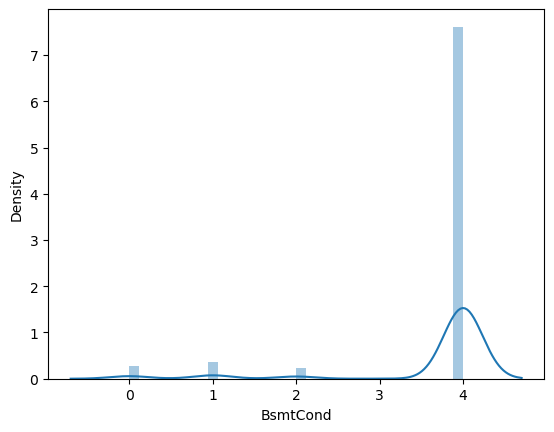

Skewness: -0.9332509664402949
count    1168.000000
mean        2.897260
std         1.586055
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


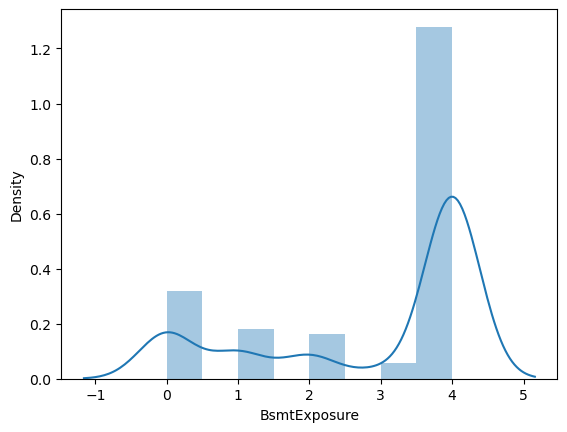

Skewness: 0.11516703926895566
count    1168.000000
mean        3.158390
std         2.231983
min         0.000000
25%         2.000000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


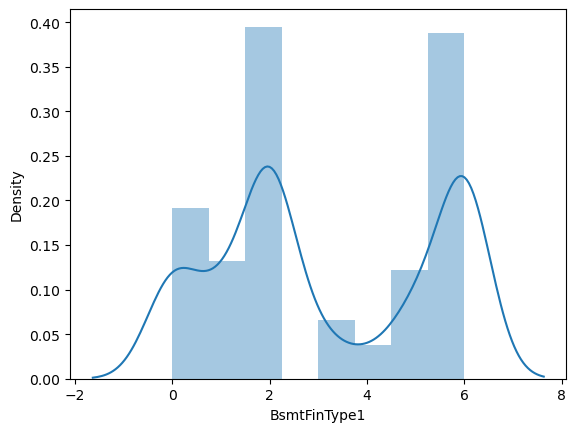

Skewness: -3.3298086542556797
count    1168.000000
mean        5.608733
std         1.165114
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: BsmtFinType2, dtype: float64


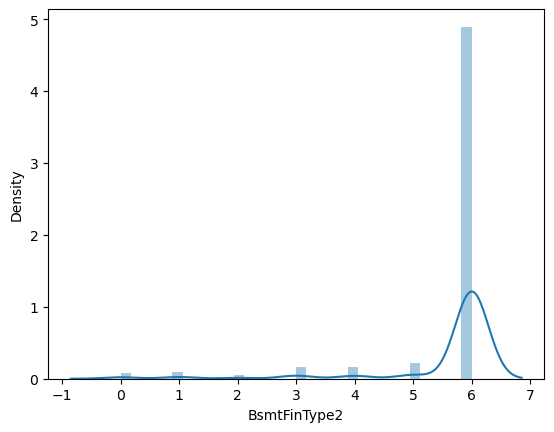

Skewness: 0.5105338295536095
count    1168.000000
mean        1.512842
std         1.739162
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


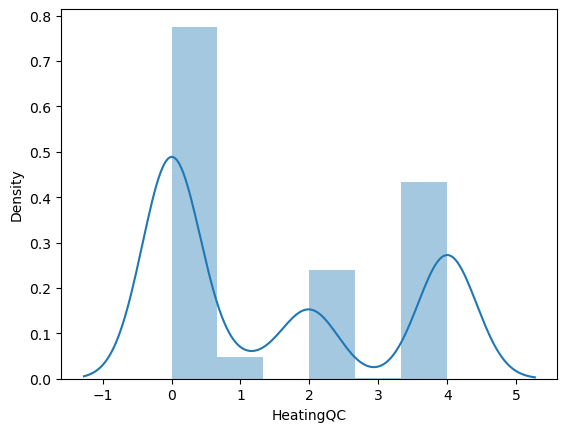

Skewness: -1.40387601930071
count    1168.000000
mean        2.338185
std         0.820379
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: KitchenQual, dtype: float64


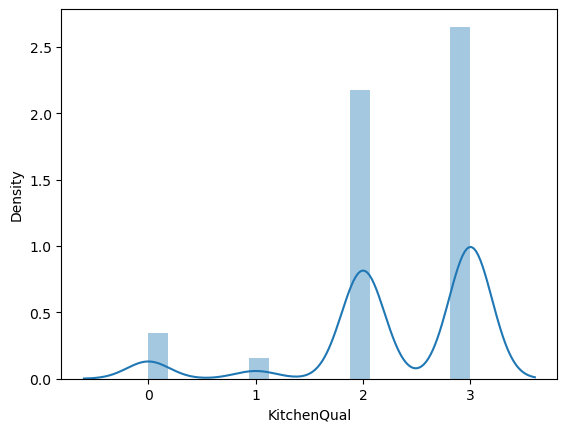

Skewness: -4.11887907853554
count    1168.000000
mean        5.760274
std         0.947136
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


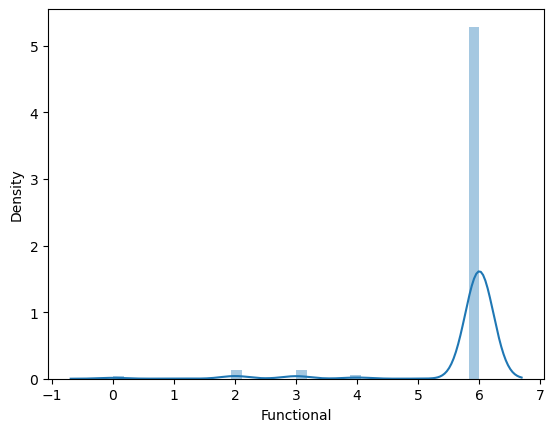

Skewness: 0.3515550980650846
count    1168.000000
mean        3.113014
std         1.161022
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


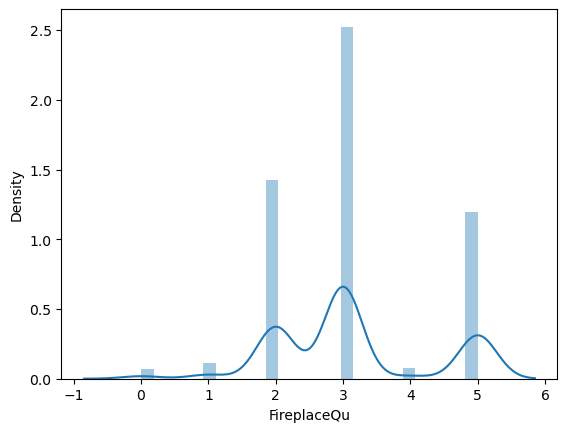

Skewness: -0.598616551528245
count    1168.000000
mean        1.865582
std         1.195499
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


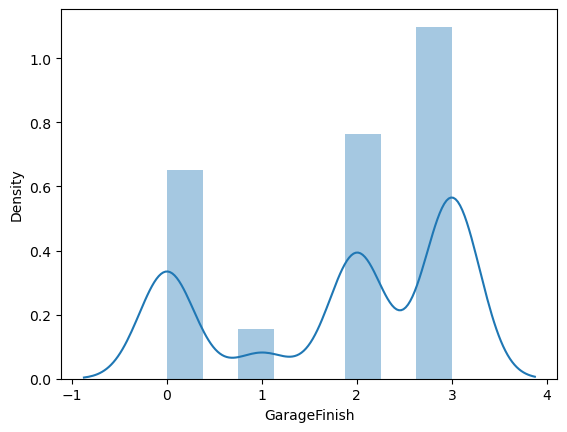

Skewness: -3.2848727986878914
count    1168.000000
mean        4.720034
std         0.889552
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


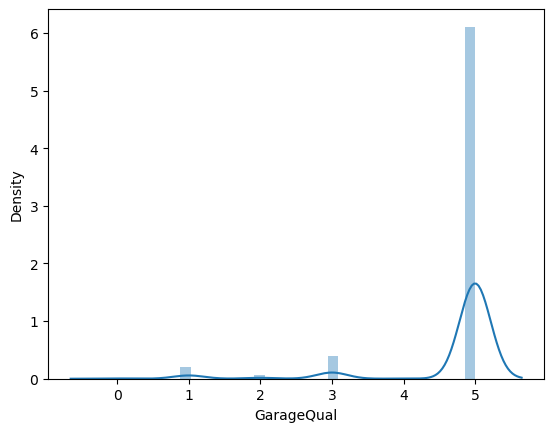

Skewness: -3.5041617303980965
count    1168.000000
mean        4.752568
std         0.819374
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


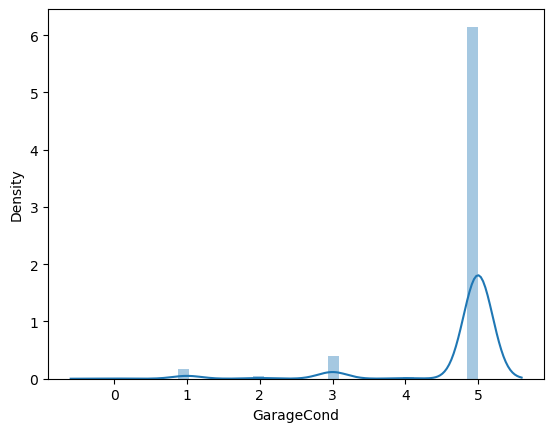

Skewness: -3.0920202848468086
count    1168.000000
mean        1.839897
std         0.522879
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


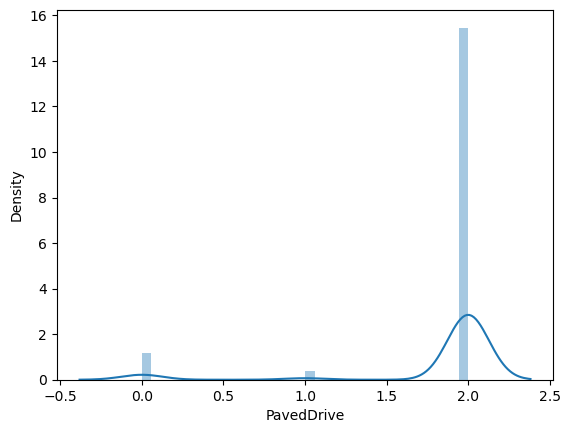

Skewness: -17.71153259484384
count    1168.000000
mean        2.990582
std         0.146061
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


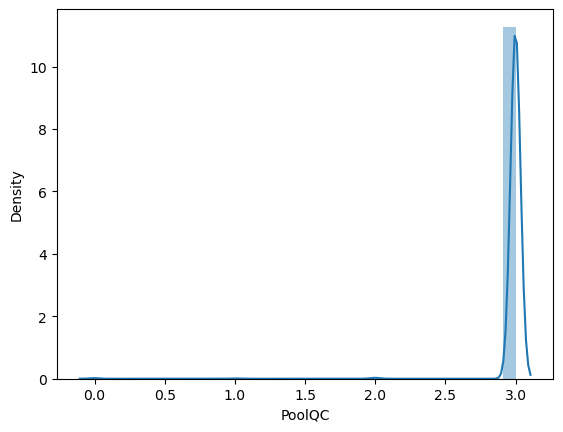

In [18]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [19]:
def transform_col(df):
    df['LotFrontage']=np.log10(df['LotFrontage'])
    df['LotArea']=np.log10(df['LotArea'])
    df['MasVnrArea']=np.log1p(df['MasVnrArea'])
    df['BsmtFinSF1']=np.log1p(df['BsmtFinSF1'])
    df['1stFlrSF']=np.log(df['1stFlrSF'])
    df['GrLivArea']=np.log(df['GrLivArea'])# last change made
    return df
training=transform_col(training)
validation=transform_col(validation)
test_data=transform_col(test_data)

Skewness: -0.8703743930613744
count    1168.000000
mean        1.827335
std         0.142521
min         1.322219
25%         1.778151
50%         1.845098
75%         1.903090
max         2.495544
Name: LotFrontage, dtype: float64


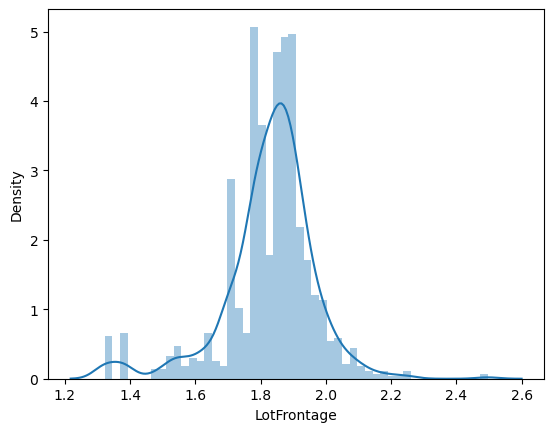

Skewness: 0.002177824522423999
count    1168.000000
mean        3.961828
std         0.226973
min         3.113943
25%         3.878522
50%         3.980708
75%         4.068019
max         5.332933
Name: LotArea, dtype: float64


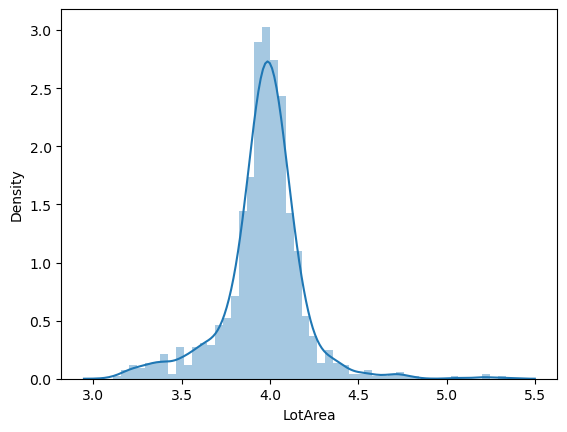

Skewness: 0.4506303519961394
count    1168.000000
mean        2.187639
std         2.642184
min         0.000000
25%         0.000000
50%         0.000000
75%         5.135798
max         7.378384
Name: MasVnrArea, dtype: float64


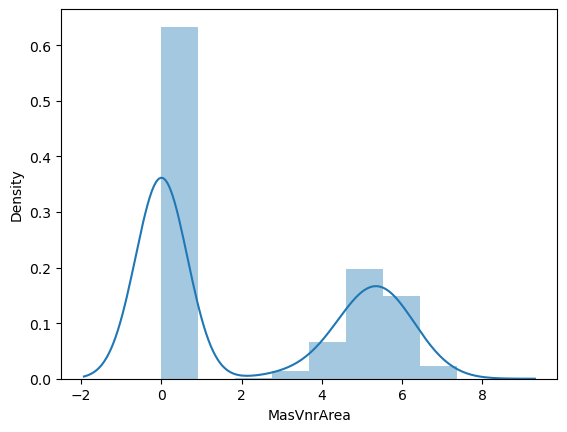

Skewness: -0.616162558976669
count    1168.000000
mean        4.229316
std         2.992844
min         0.000000
25%         0.000000
50%         5.953243
75%         6.575076
max         8.638525
Name: BsmtFinSF1, dtype: float64


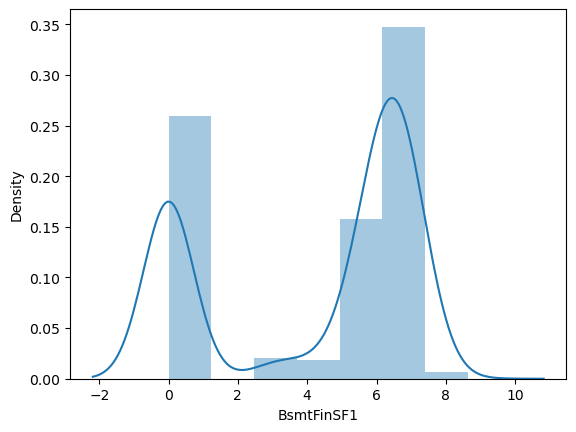

Skewness: 4.50030451064517
count    1168.000000
mean       44.134418
std       160.708430
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


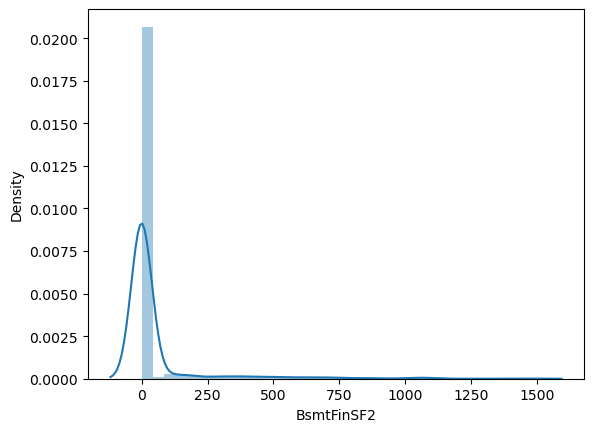

Skewness: 0.8693187028207706
count    1168.000000
mean      569.309075
std       441.819995
min         0.000000
25%       228.000000
50%       480.500000
75%       813.250000
max      2153.000000
Name: BsmtUnfSF, dtype: float64


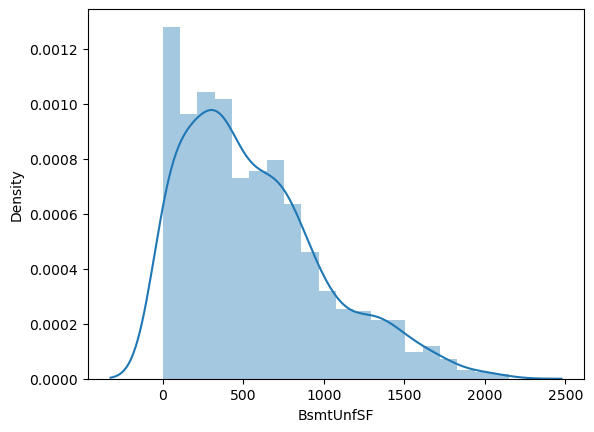

Skewness: 1.6425187840902926
count    1168.000000
mean     1057.673801
std       434.996954
min         0.000000
25%       803.000000
50%      1002.500000
75%      1302.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


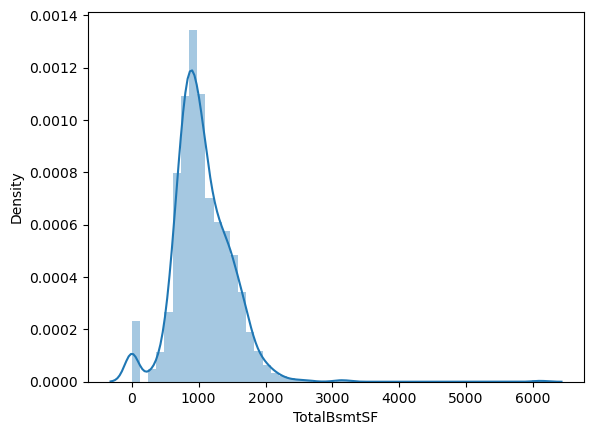

Skewness: 0.06978966500810278
count    1168.000000
mean        7.012253
std         0.311444
min         5.811141
25%         6.795426
50%         6.992096
75%         7.238856
max         8.453614
Name: 1stFlrSF, dtype: float64


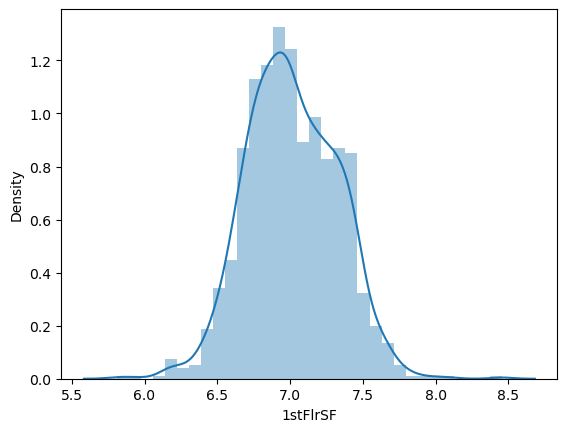

Skewness: 0.8202647316981831
count    1168.000000
mean      347.656678
std       440.278532
min         0.000000
25%         0.000000
50%         0.000000
75%       730.500000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


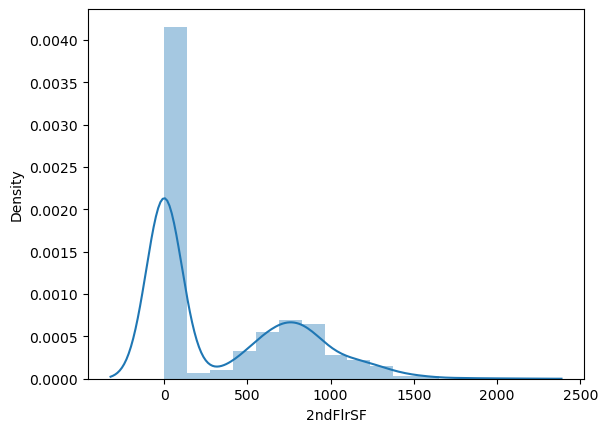

Skewness: 8.87844804992994
count    1168.000000
mean        6.035959
std        49.444909
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


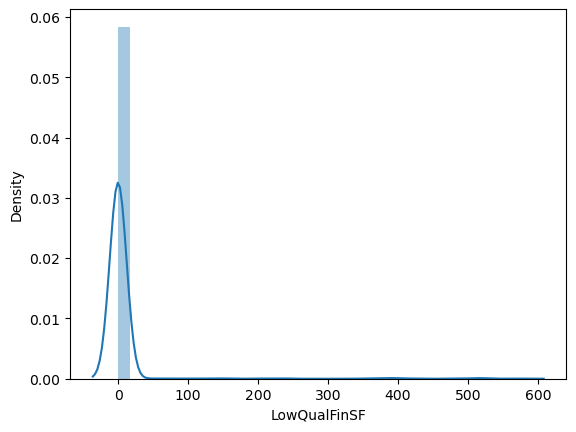

Skewness: -0.03740542372475751
count    1168.000000
mean        7.270709
std         0.333373
min         5.811141
25%         7.030636
50%         7.293358
75%         7.487734
max         8.637994
Name: GrLivArea, dtype: float64


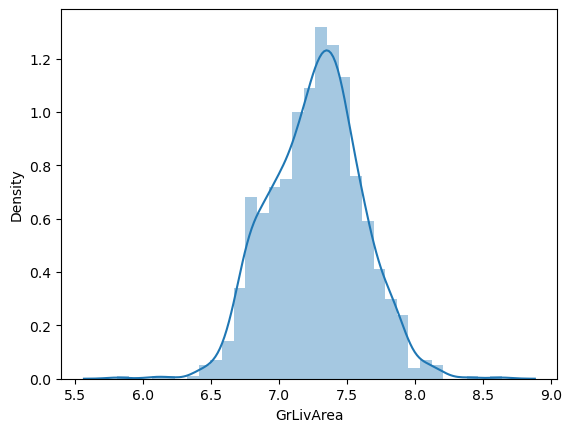

Skewness: 0.656999348472453
count    1168.000000
mean        0.422089
std         0.522756
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


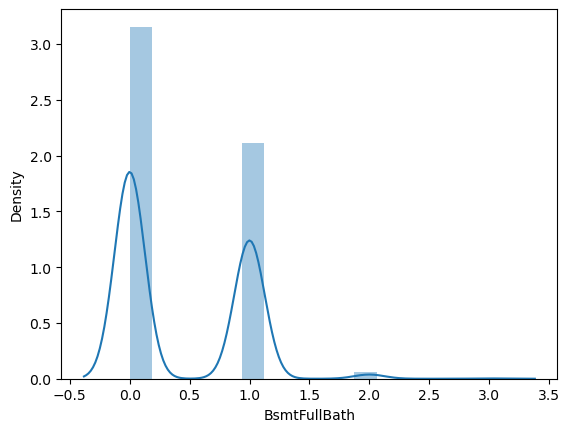

Skewness: 4.221626742200592
count    1168.000000
mean        0.056507
std         0.238300
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


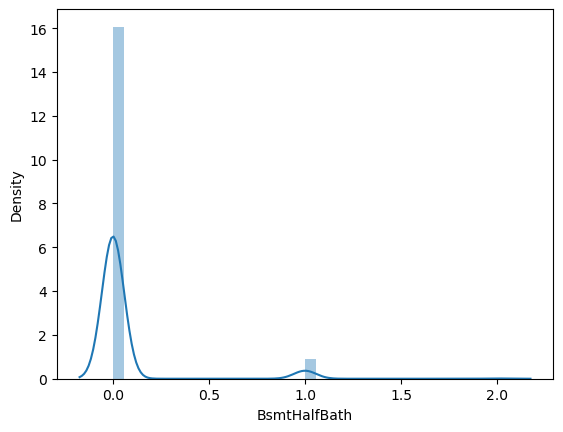

Skewness: -0.017019279798942147
count    1168.000000
mean        1.562500
std         0.550327
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


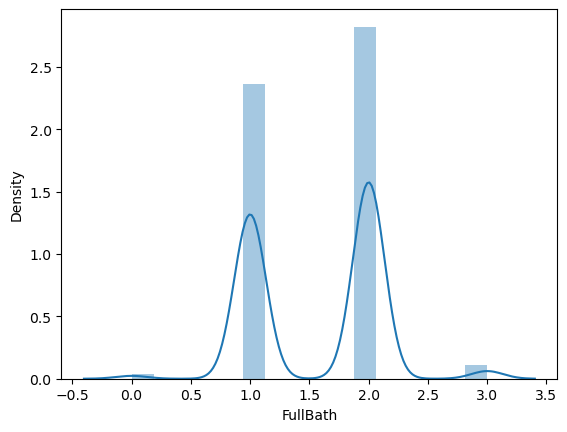

Skewness: 0.7232434717971986
count    1168.000000
mean        0.381849
std         0.506762
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


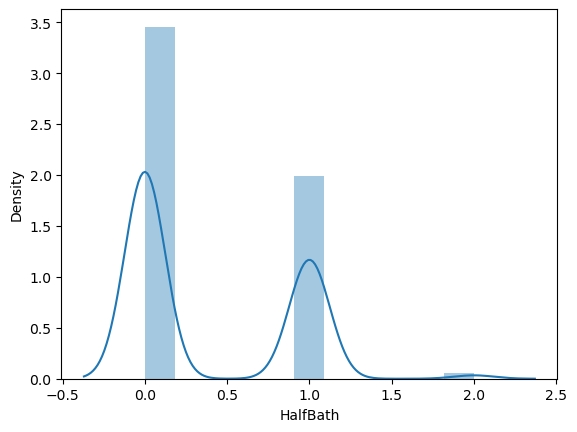

Skewness: 0.25524414486081315
count    1168.000000
mean        2.865582
std         0.829974
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


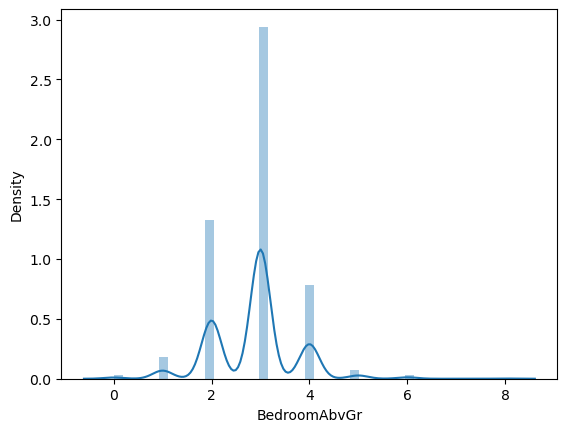

Skewness: 4.350761455018229
count    1168.000000
mean        1.049658
std         0.228853
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


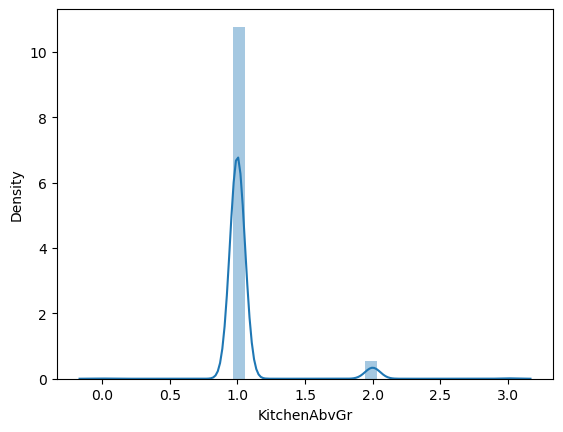

Skewness: 0.6524162029006894
count    1168.000000
mean        6.549658
std         1.634336
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


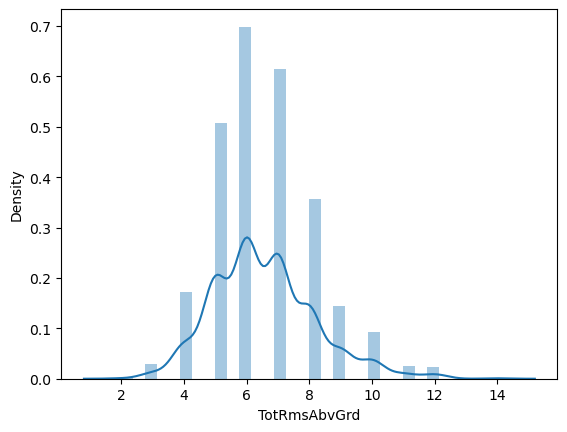

Skewness: 0.5830561836069049
count    1168.000000
mean        0.614726
std         0.636391
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


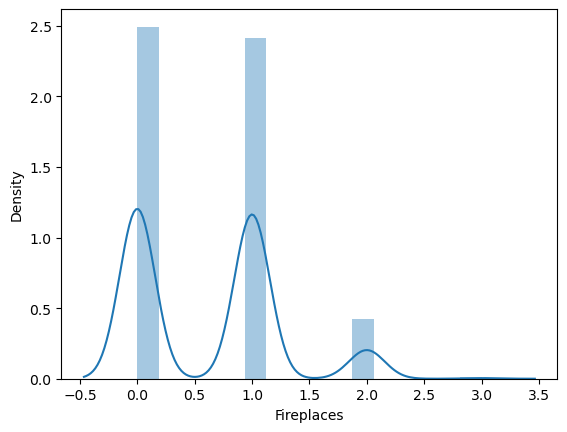

Skewness: -0.3616135551559263
count    1168.000000
mean        1.773116
std         0.752531
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


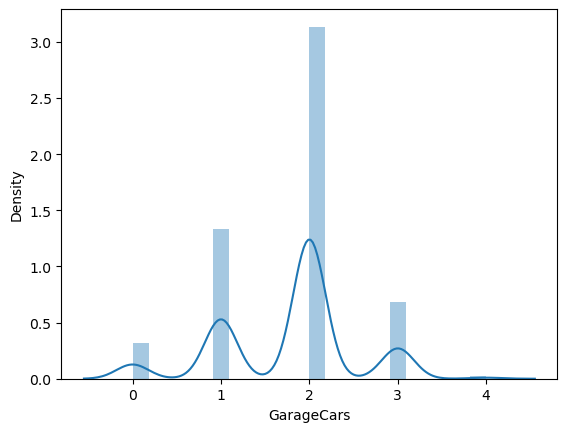

Skewness: 0.18878803980641282
count    1168.000000
mean      473.757705
std       216.084302
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


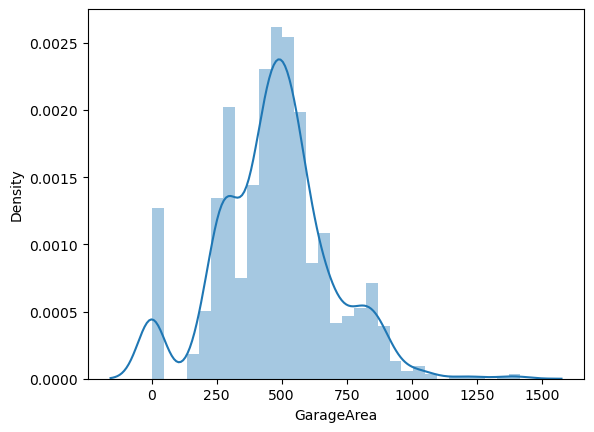

Skewness: 1.5727546647403368
count    1168.000000
mean       94.396404
std       125.868811
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


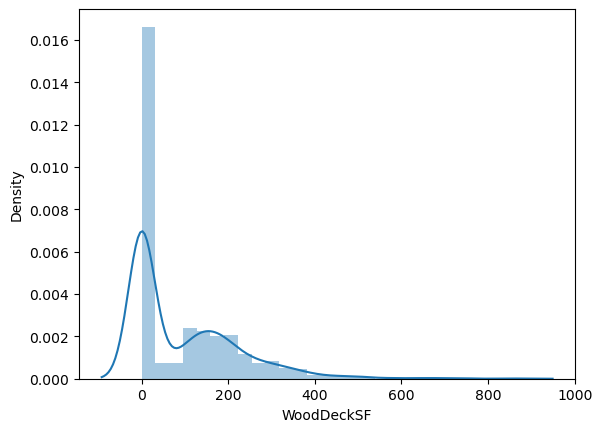

Skewness: 2.2407024465048253
count    1168.000000
mean       46.705479
std        65.580257
min         0.000000
25%         0.000000
50%        24.500000
75%        68.250000
max       523.000000
Name: OpenPorchSF, dtype: float64


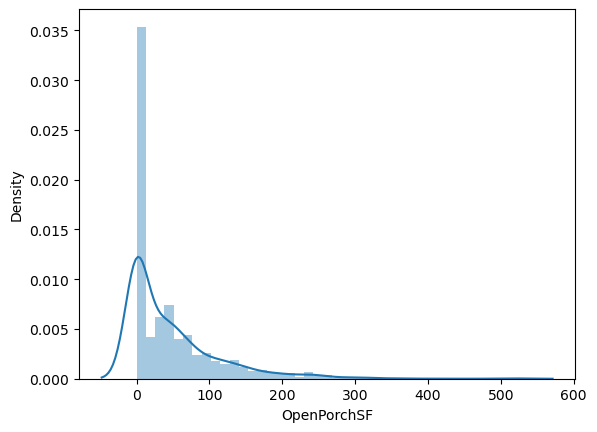

Skewness: 3.1467105194492886
count    1168.000000
mean       22.260274
std        62.275784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


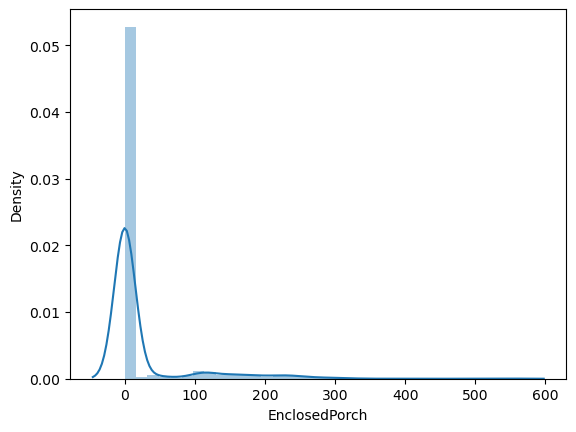

Skewness: 9.656689788584668
count    1168.000000
mean        3.953767
std        31.905139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


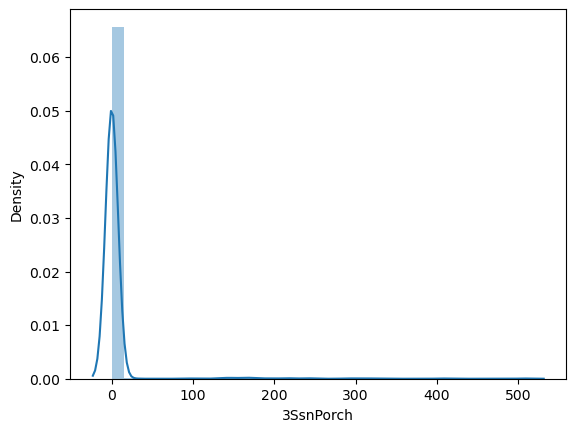

Skewness: 4.148818236004729
count    1168.000000
mean       14.710616
std        55.471186
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       440.000000
Name: ScreenPorch, dtype: float64


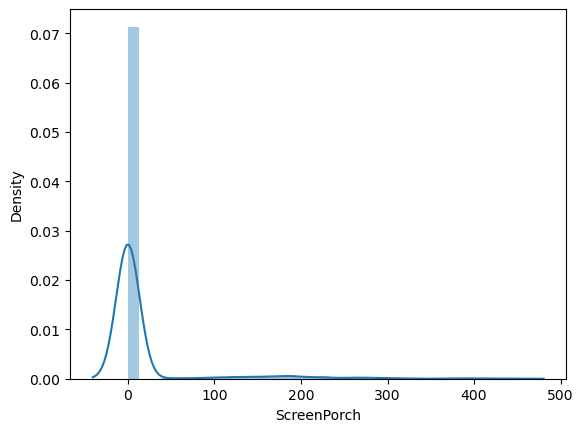

Skewness: 14.371069590694683
count    1168.000000
mean        2.893836
std        40.736249
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


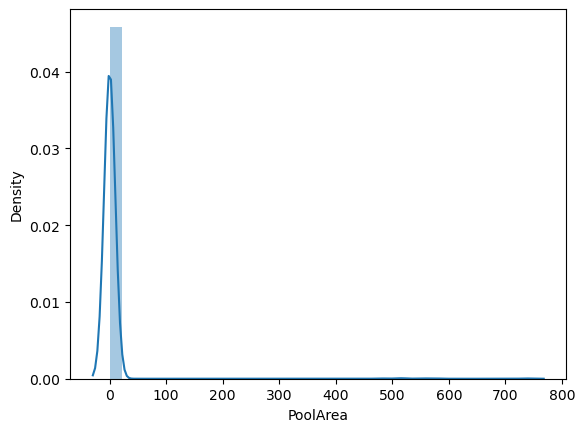

Skewness: 23.201667249229928
count     1168.000000
mean        44.815068
std        542.983929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


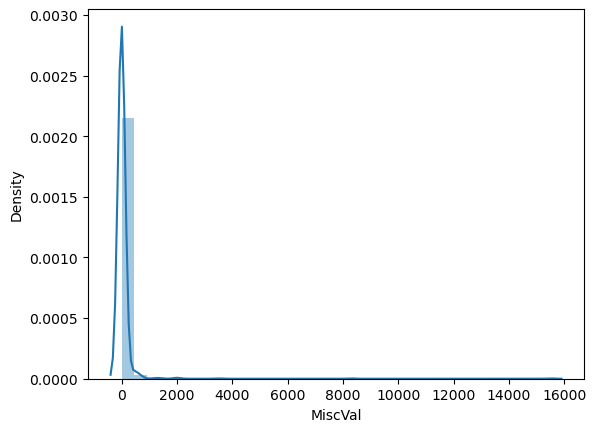

Skewness: 1.8419672630902362
count     1168.000000
mean      2571.146404
std        812.986244
min        334.000000
25%       2014.750000
50%       2484.000000
75%       3006.500000
max      11752.000000
Name: TotalSF, dtype: float64


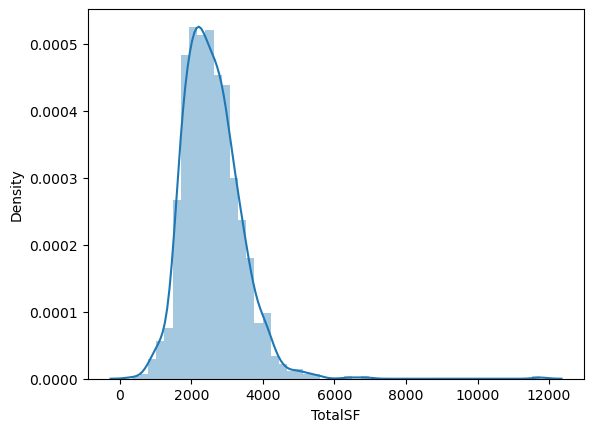

Skewness: 0.29567976497647763
count    1168.000000
mean        2.203767
std         0.791722
min         1.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.000000
Name: Total_Bathrooms, dtype: float64


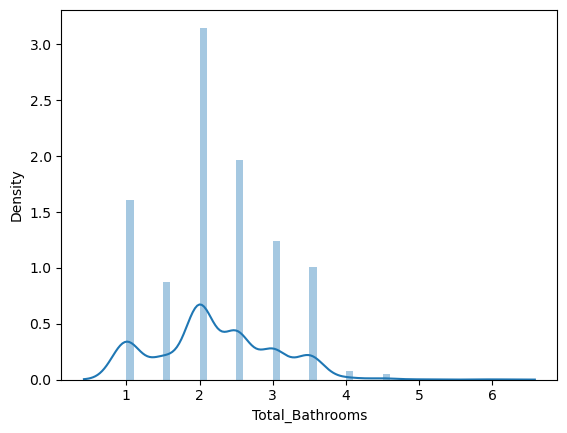

Skewness: 0.5838099251296484
count    1168.000000
mean        0.450342
std         0.520052
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


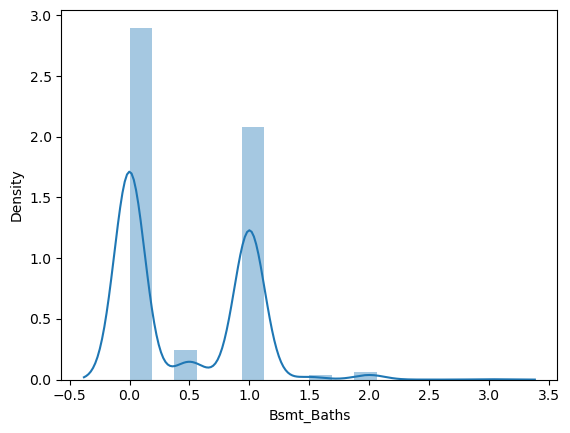

Skewness: 0.1216650011930925
count    1168.000000
mean        1.753425
std         0.638984
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


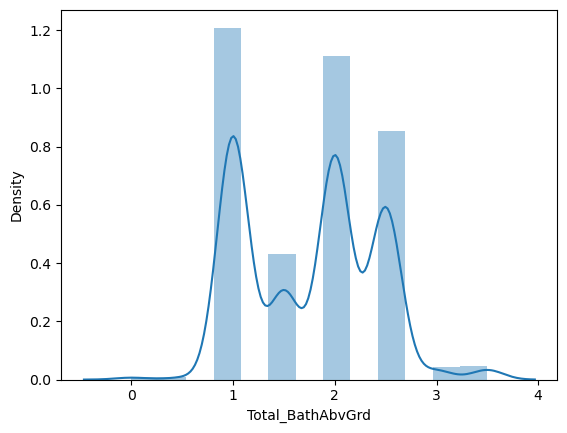

Skewness: 0.9216724827318452
count    1168.000000
mean      207.710326
std        37.706589
min       112.037037
25%       181.836124
50%       204.114583
75%       228.277027
max       434.000000
Name: AvgRoomSize, dtype: float64


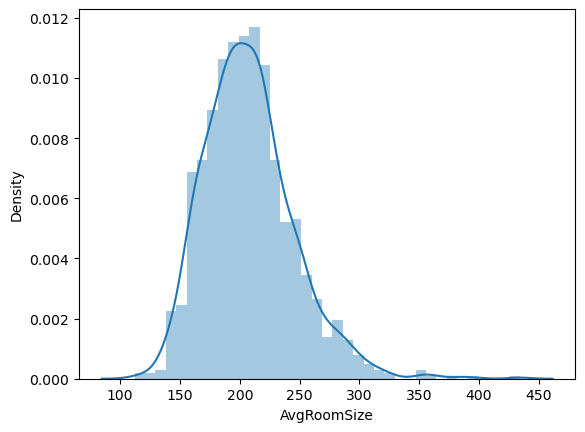

Skewness: 1.0252658853702972
count    1168.000000
mean      182.026541
std       157.283778
min         0.000000
25%        44.000000
50%       164.500000
75%       268.250000
max       929.000000
Name: Total_porch_sf, dtype: float64


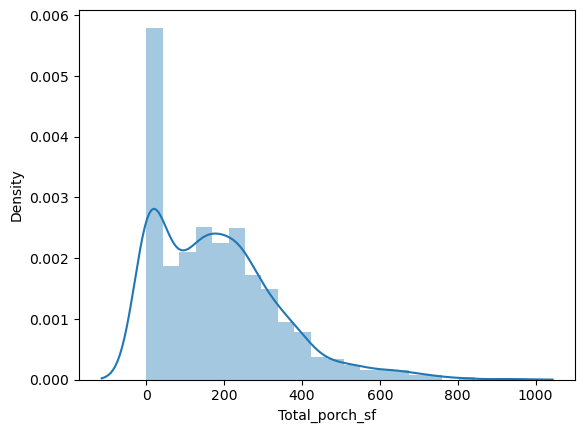

Skewness: 0.7967134745960945
count    1168.000000
mean        5.243579
std         2.822278
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


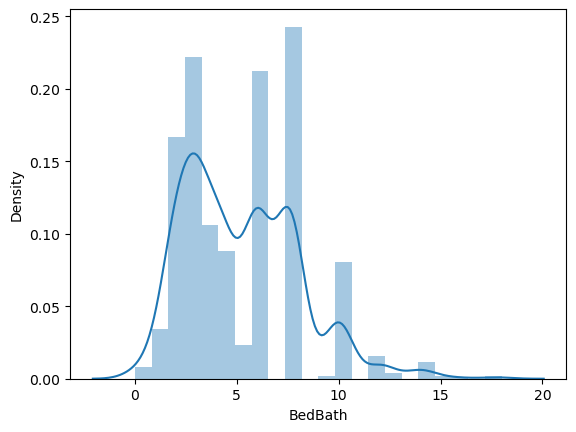

Skewness: 11.77971850192839
count      1168.000000
mean      10795.931507
std       10817.162680
min        1324.000000
25%        7630.000000
50%        9642.500000
75%       11768.250000
max      215395.000000
Name: TotalLot, dtype: float64


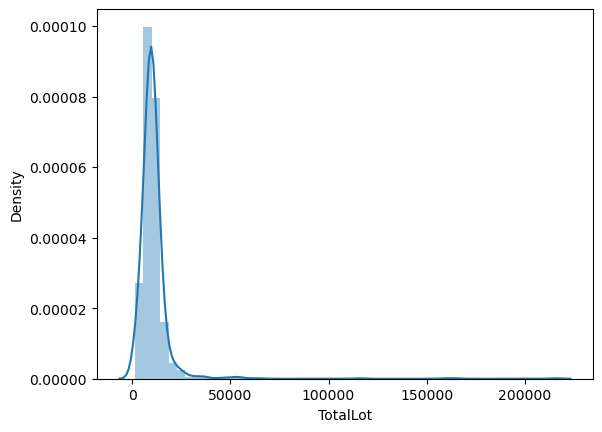

Skewness: 1.8457077303501002
count     1168.000000
mean      2577.182363
std        814.489623
min        334.000000
25%       2016.000000
50%       2485.000000
75%       3013.500000
max      11752.000000
Name: sqft_living, dtype: float64


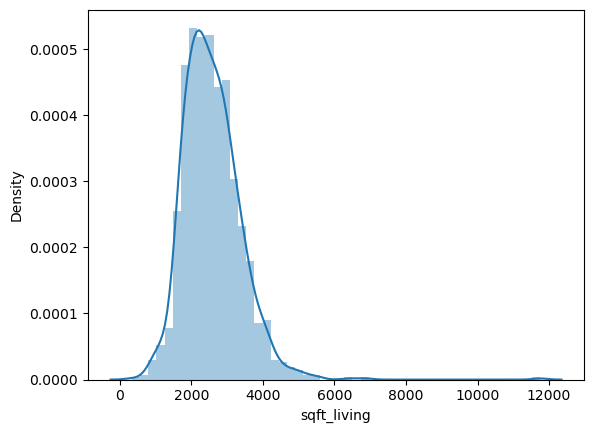

Skewness: 0.6243908725027593
count    1168.000000
mean       36.742295
std        30.542754
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


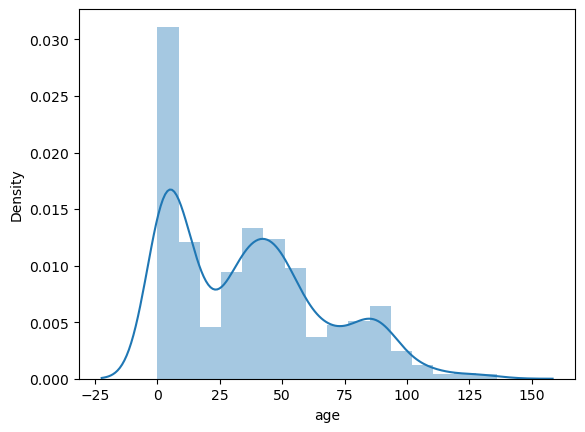

In [20]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

Skewness: 0.16781632213080494
count    1168.000000
mean        6.111301
std         1.374742
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


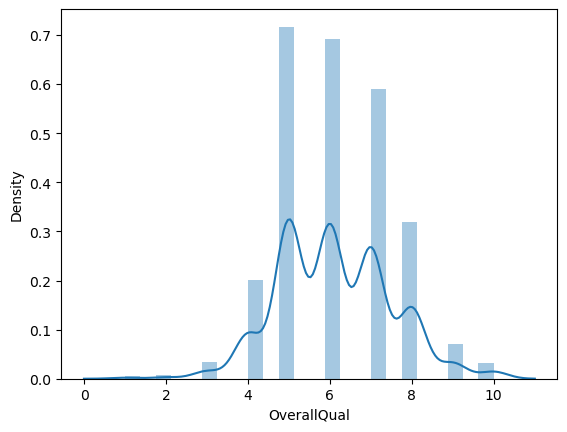

Skewness: 0.709632924338739
count    1168.000000
mean        5.583904
std         1.119959
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


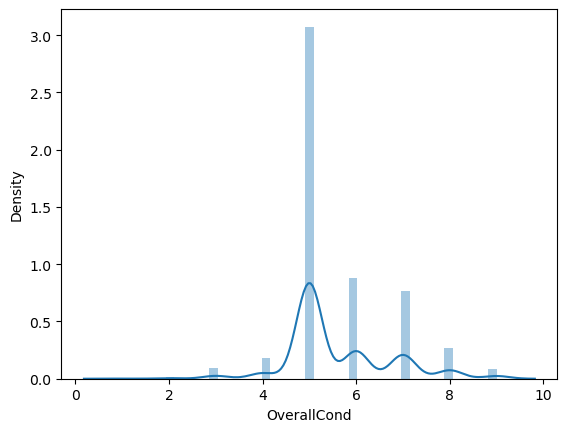

Skewness: 0.2224827223283675
count    1168.000000
mean        6.299658
std         2.666418
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


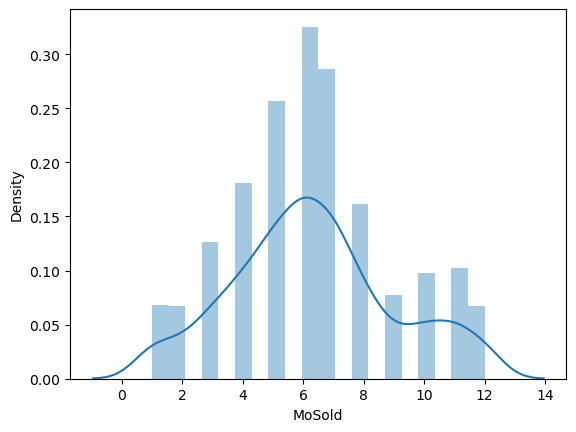

Skewness: -0.5851472189337553
count    1168.000000
mean        1.926370
std         1.411687
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


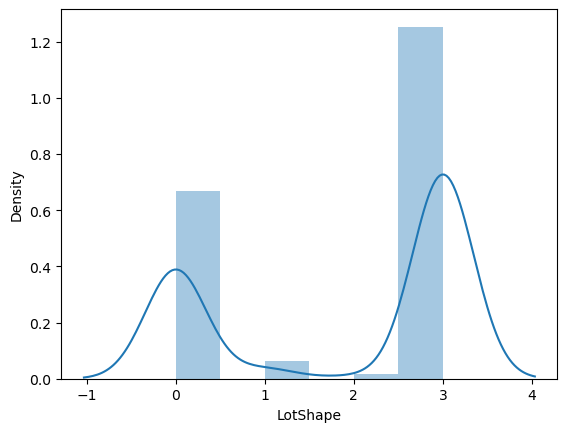

Skewness: -3.0609283844200283
count    1168.000000
mean        2.766267
std         0.721319
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


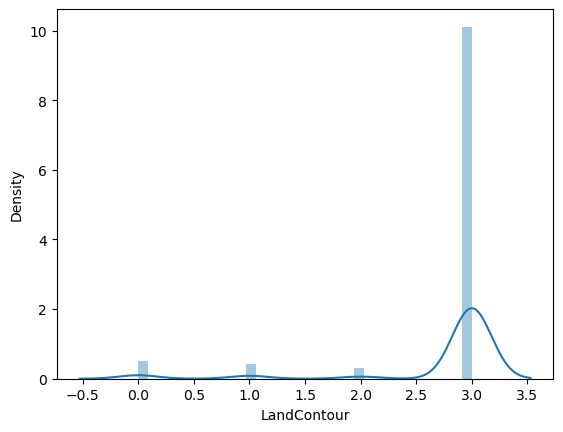

Skewness: 4.777938371393661
count    1168.000000
mean        0.065925
std         0.289673
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


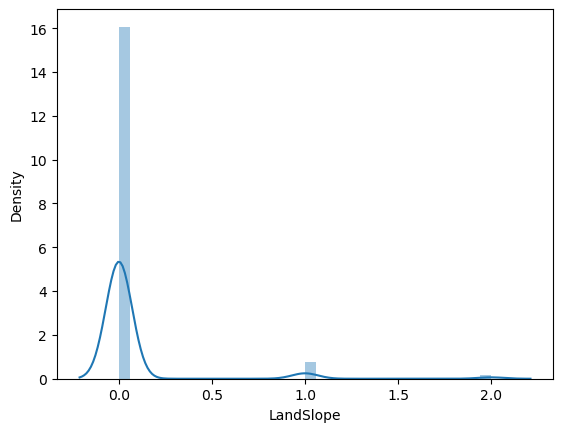

Skewness: -1.767928010896546
count    1168.00000
mean        2.52911
std         0.69087
min         0.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         3.00000
Name: ExterQual, dtype: float64


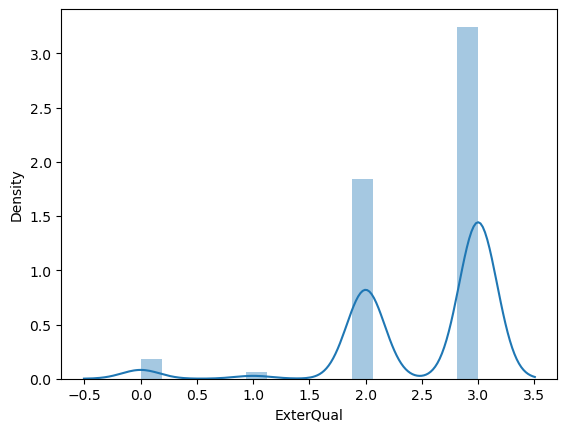

Skewness: -2.4987885429383754
count    1168.000000
mean        3.725171
std         0.741001
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


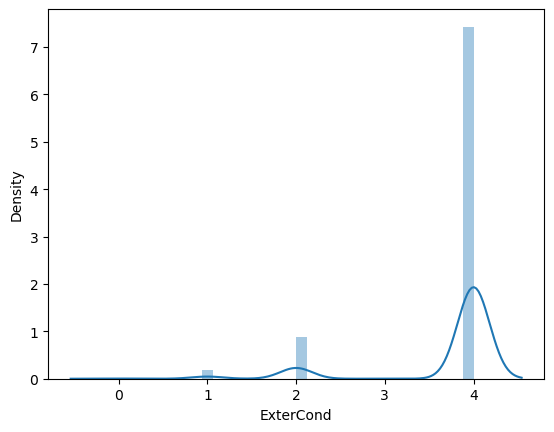

Skewness: -0.4932239330390275
count    1168.000000
mean        2.738870
std         1.262251
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


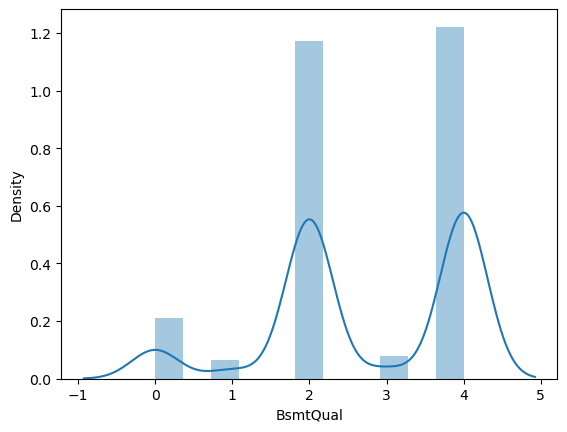

Skewness: -2.9070836360757513
count    1168.000000
mean        3.684075
std         0.959516
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


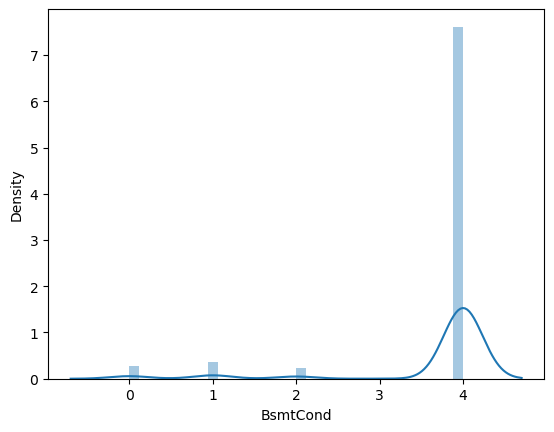

Skewness: -0.9332509664402949
count    1168.000000
mean        2.897260
std         1.586055
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


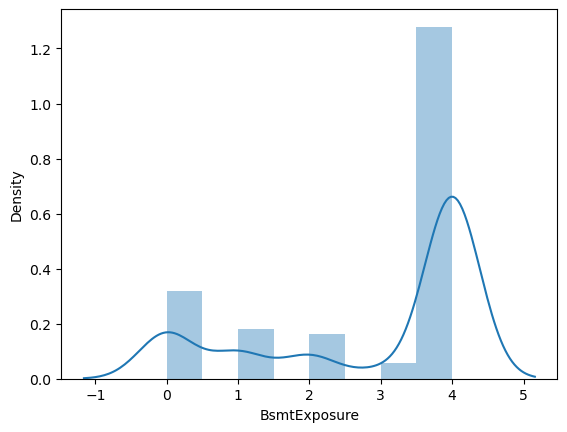

Skewness: 0.11516703926895566
count    1168.000000
mean        3.158390
std         2.231983
min         0.000000
25%         2.000000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


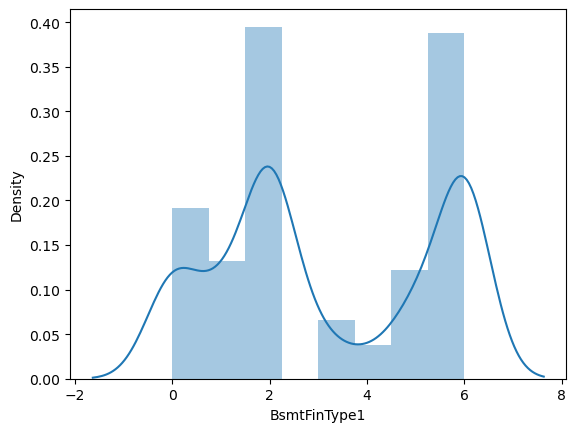

Skewness: -3.3298086542556797
count    1168.000000
mean        5.608733
std         1.165114
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: BsmtFinType2, dtype: float64


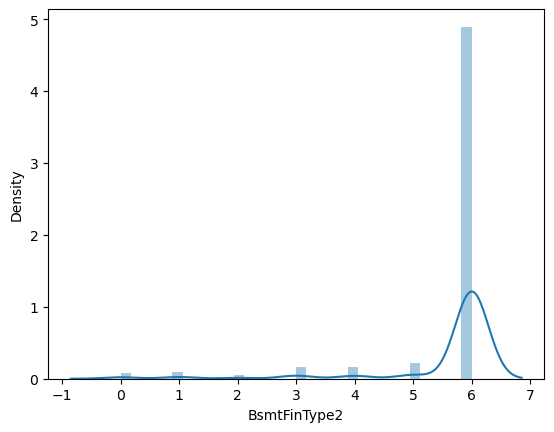

Skewness: 0.5105338295536095
count    1168.000000
mean        1.512842
std         1.739162
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


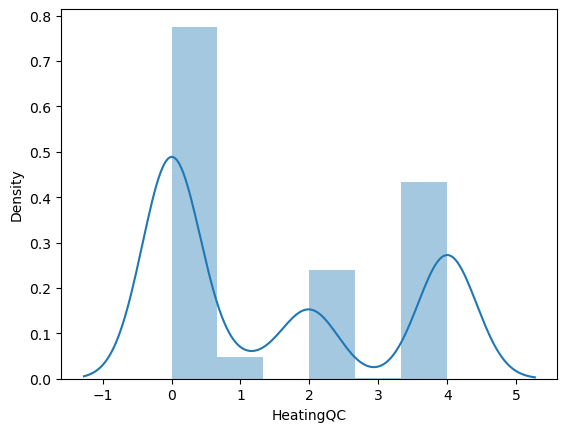

Skewness: -1.40387601930071
count    1168.000000
mean        2.338185
std         0.820379
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: KitchenQual, dtype: float64


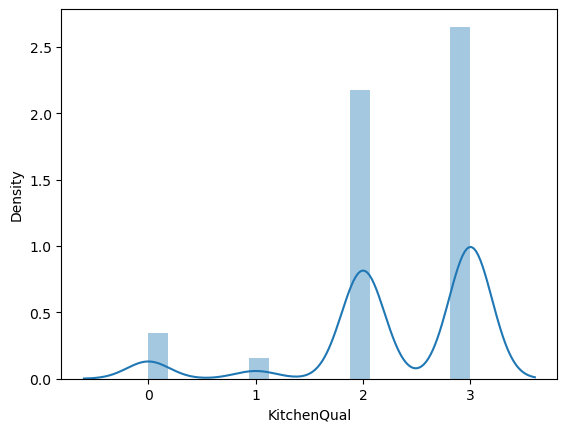

Skewness: -4.11887907853554
count    1168.000000
mean        5.760274
std         0.947136
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


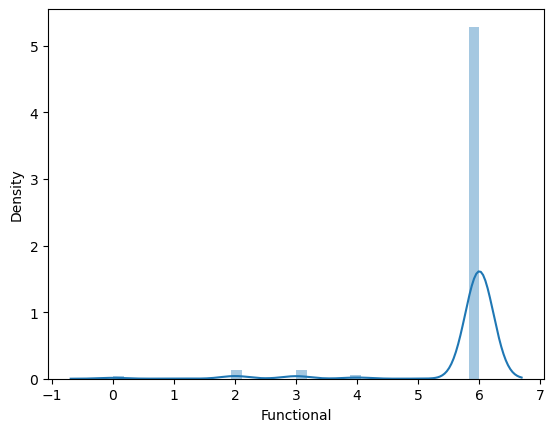

Skewness: 0.3515550980650846
count    1168.000000
mean        3.113014
std         1.161022
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


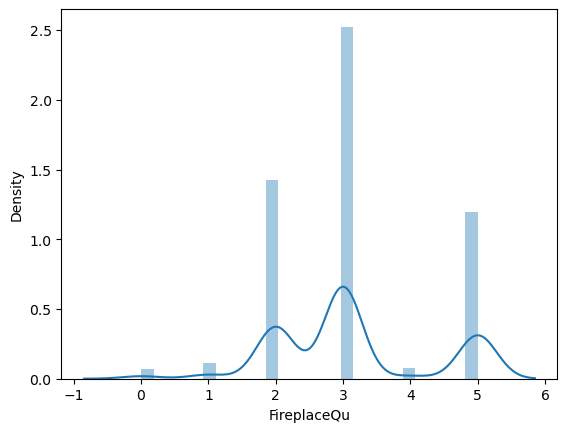

Skewness: -0.598616551528245
count    1168.000000
mean        1.865582
std         1.195499
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


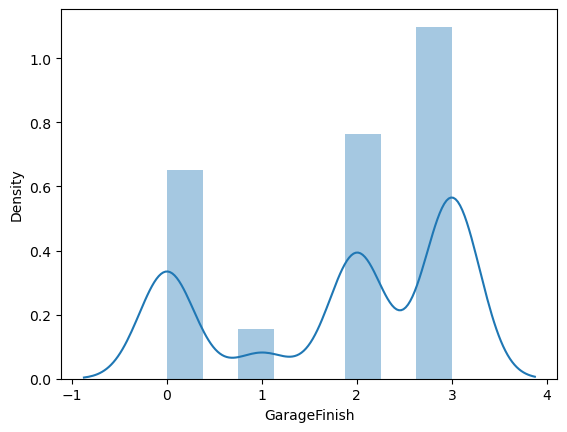

Skewness: -3.2848727986878914
count    1168.000000
mean        4.720034
std         0.889552
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


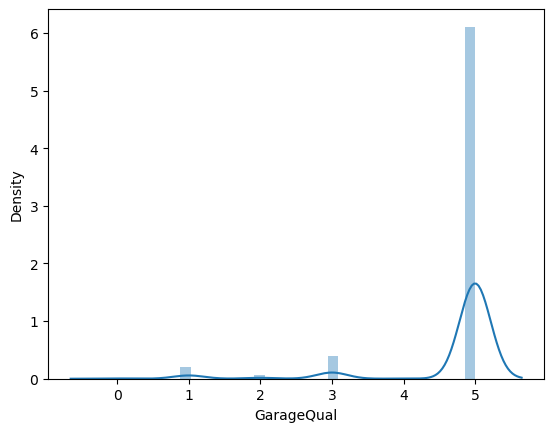

Skewness: -3.5041617303980965
count    1168.000000
mean        4.752568
std         0.819374
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


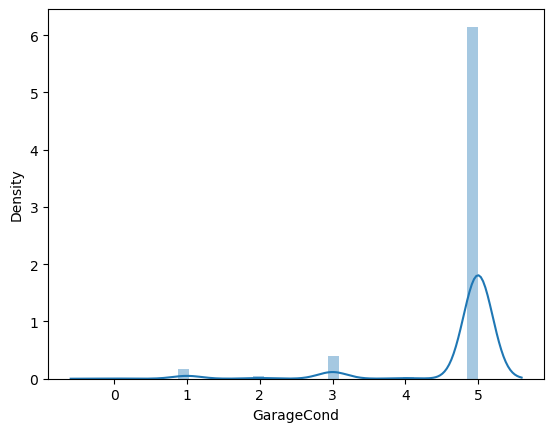

Skewness: -3.0920202848468086
count    1168.000000
mean        1.839897
std         0.522879
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


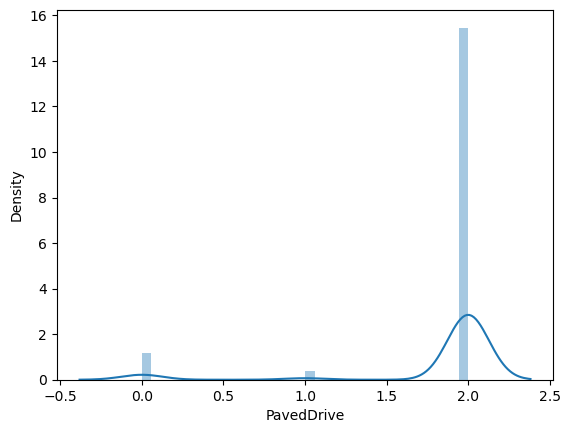

Skewness: -17.71153259484384
count    1168.000000
mean        2.990582
std         0.146061
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


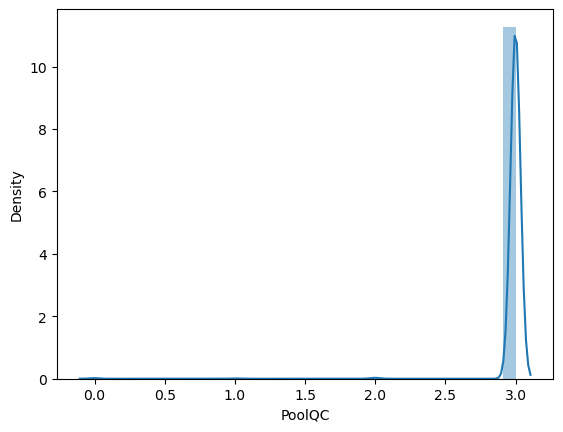

In [21]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [22]:
def get_outliers(df, num_feat):
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    for col in num_feat:      
#         lower = df[col].mean() - df[col].std() * 3
#         upper = df[col].mean() + df[col].std() * 3
        lower=np.percentile(df[col],25)-(1.5*iqr(df[col]))
        upper=np.percentile(df[col],75)+(1.5*iqr(df[col]))
        upper_outliers = df[df[col] > upper]
        lower_outliers = df[df[col] < lower]
        total=lower_outliers.shape[0]+upper_outliers.shape[0]
        if (total!=0) and (upper!=0 and lower!=0):
            new_row_df = pd.DataFrame([{'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}])
            outlier_df = pd.concat([outlier_df, new_row_df], ignore_index=True)#outlier_df.append({'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        elif (total!=0) and (upper==lower):
            new_row_df = pd.DataFrame([{'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}])
            outlier_df = pd.concat([outlier_df, new_row_df], ignore_index=True)
    return outlier_df
def remove_outliers(df, outlier_df, num_feat):
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        df[col] = np.where((df[col]<lower)|(df[col]>upper), df[col].median(), df[col])
    return df
num_list=['BsmtFinSF2','TotalBsmtSF','LowQualFinSF']
outlier_df = get_outliers(training,num_list)
training=remove_outliers(training,outlier_df,num_list)
outlier_df

Feature Total Outliers  Upper limit  Lower limit
0    BsmtFinSF2            126         0.00         0.00
1   TotalBsmtSF             48      2051.75        53.75
2  LowQualFinSF             21         0.00         0.00

Skewness: -0.8703743930613744
count    1168.000000
mean        1.827335
std         0.142521
min         1.322219
25%         1.778151
50%         1.845098
75%         1.903090
max         2.495544
Name: LotFrontage, dtype: float64


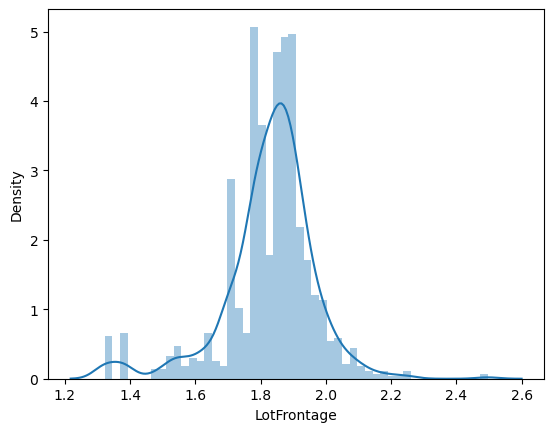

Skewness: 0.002177824522423999
count    1168.000000
mean        3.961828
std         0.226973
min         3.113943
25%         3.878522
50%         3.980708
75%         4.068019
max         5.332933
Name: LotArea, dtype: float64


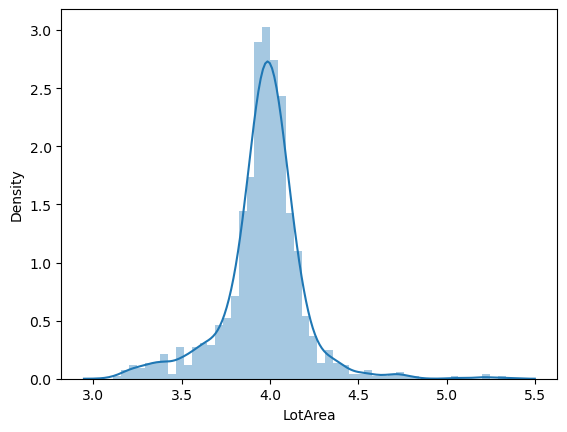

Skewness: 0.4506303519961394
count    1168.000000
mean        2.187639
std         2.642184
min         0.000000
25%         0.000000
50%         0.000000
75%         5.135798
max         7.378384
Name: MasVnrArea, dtype: float64


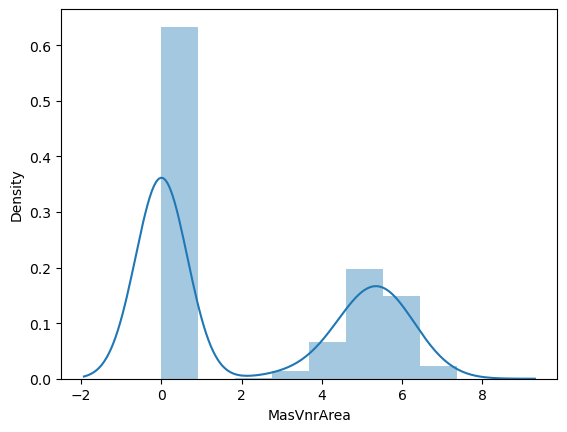

Skewness: -0.616162558976669
count    1168.000000
mean        4.229316
std         2.992844
min         0.000000
25%         0.000000
50%         5.953243
75%         6.575076
max         8.638525
Name: BsmtFinSF1, dtype: float64


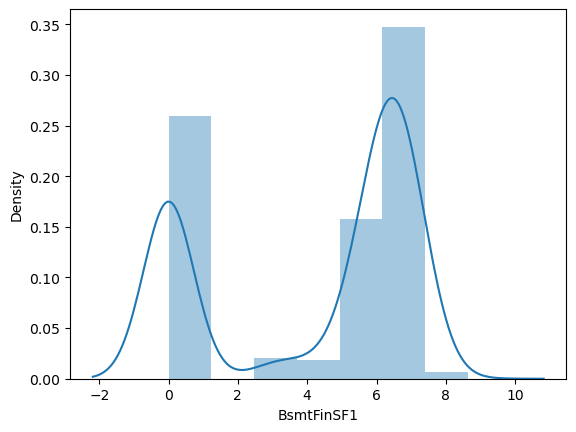

Skewness: 0
count    1168.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: BsmtFinSF2, dtype: float64


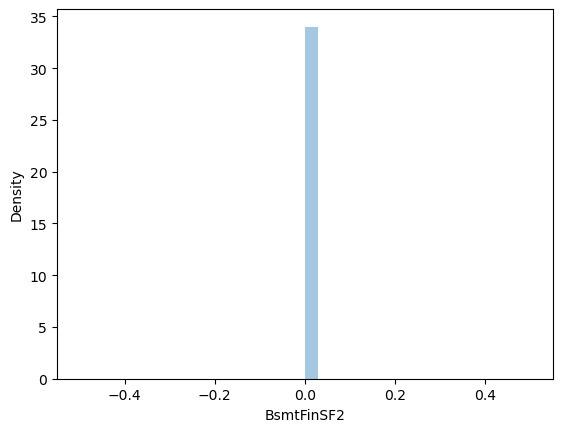

Skewness: 0.8693187028207706
count    1168.000000
mean      569.309075
std       441.819995
min         0.000000
25%       228.000000
50%       480.500000
75%       813.250000
max      2153.000000
Name: BsmtUnfSF, dtype: float64


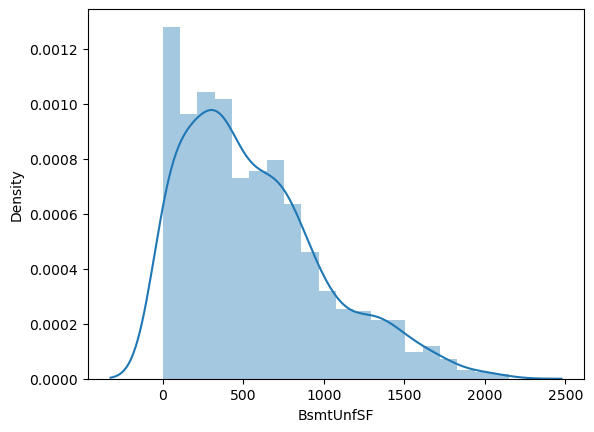

Skewness: 0.5462514799586012
count    1168.000000
mean     1065.029110
std       336.351309
min       264.000000
25%       832.000000
50%      1002.500000
75%      1276.250000
max      2046.000000
Name: TotalBsmtSF, dtype: float64


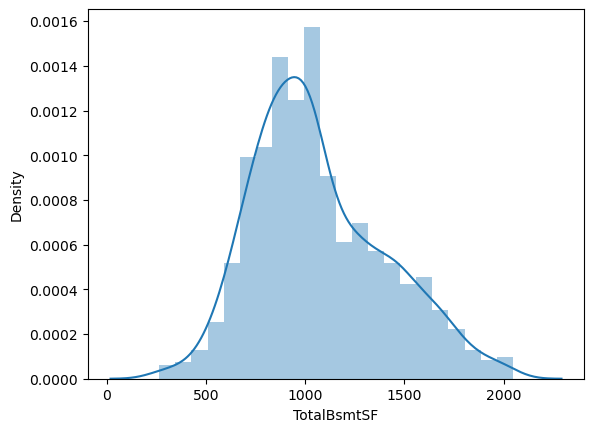

Skewness: 0.06978966500810278
count    1168.000000
mean        7.012253
std         0.311444
min         5.811141
25%         6.795426
50%         6.992096
75%         7.238856
max         8.453614
Name: 1stFlrSF, dtype: float64


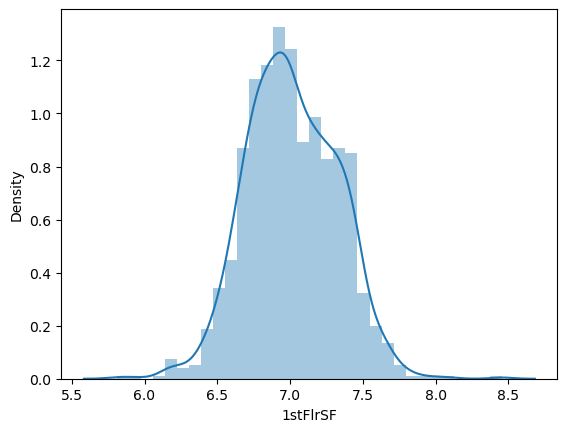

Skewness: 0.8202647316981831
count    1168.000000
mean      347.656678
std       440.278532
min         0.000000
25%         0.000000
50%         0.000000
75%       730.500000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


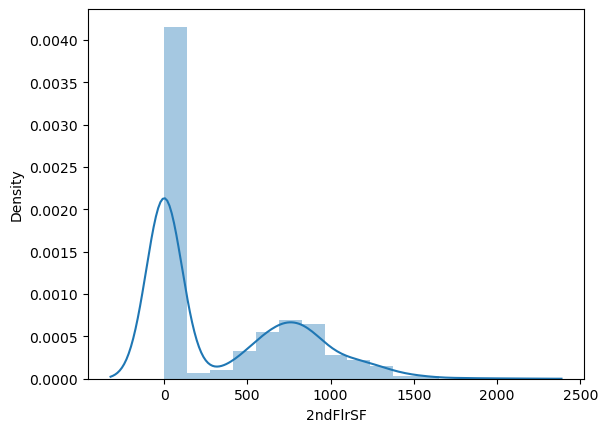

Skewness: 0
count    1168.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64


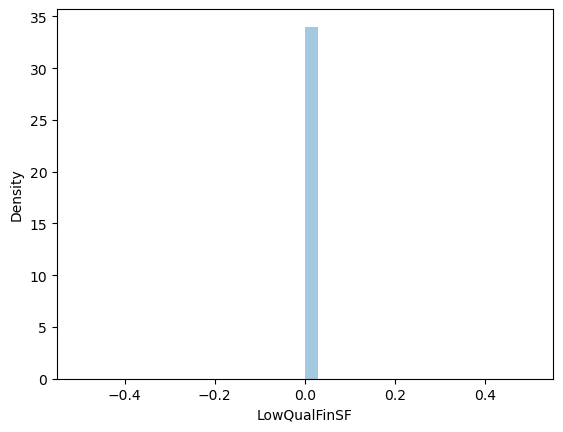

Skewness: -0.03740542372475751
count    1168.000000
mean        7.270709
std         0.333373
min         5.811141
25%         7.030636
50%         7.293358
75%         7.487734
max         8.637994
Name: GrLivArea, dtype: float64


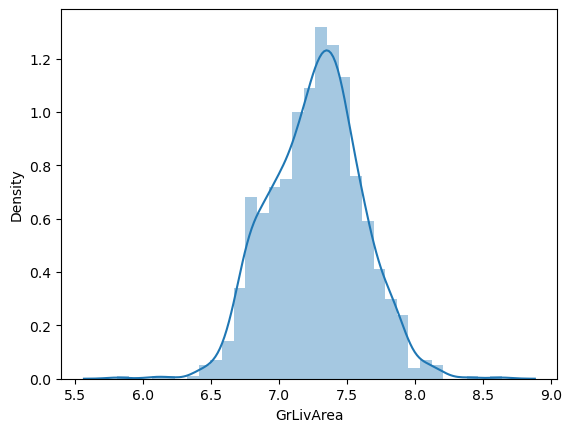

Skewness: 0.656999348472453
count    1168.000000
mean        0.422089
std         0.522756
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


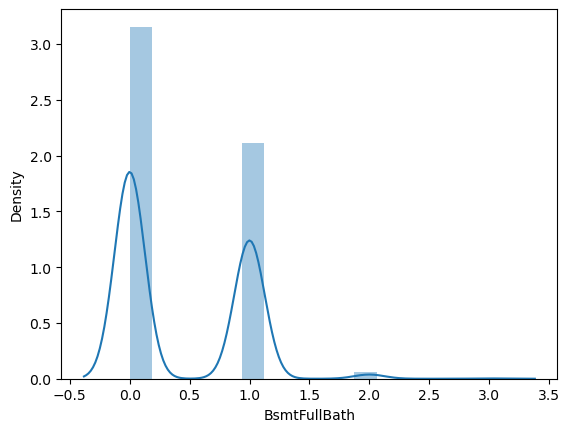

Skewness: 4.221626742200592
count    1168.000000
mean        0.056507
std         0.238300
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


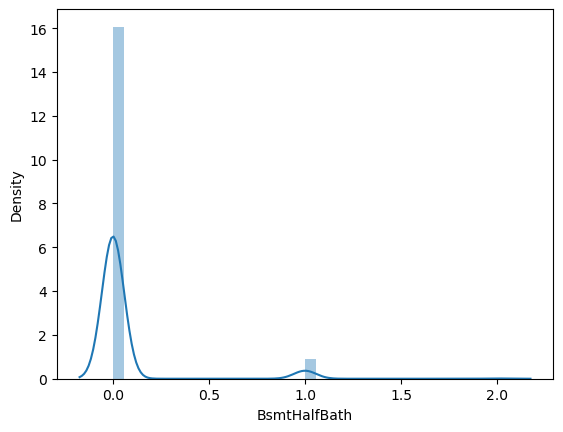

Skewness: -0.017019279798942147
count    1168.000000
mean        1.562500
std         0.550327
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


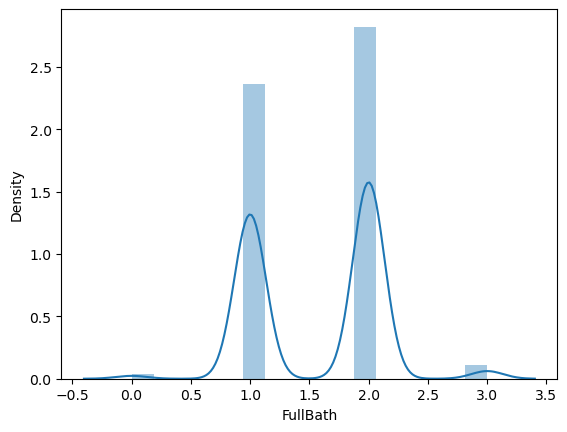

Skewness: 0.7232434717971986
count    1168.000000
mean        0.381849
std         0.506762
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


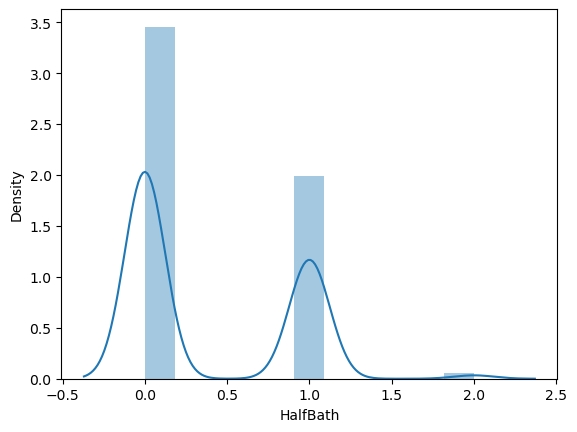

Skewness: 0.25524414486081315
count    1168.000000
mean        2.865582
std         0.829974
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


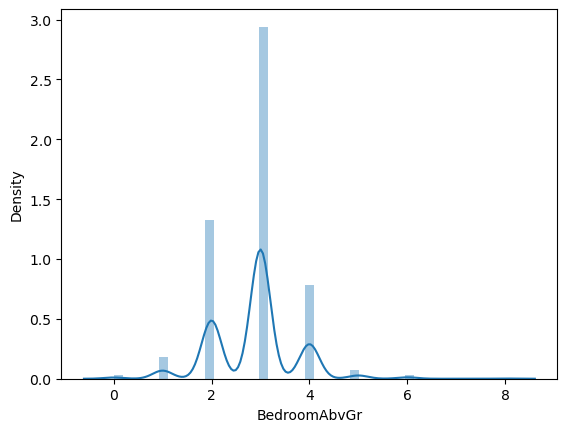

Skewness: 4.350761455018229
count    1168.000000
mean        1.049658
std         0.228853
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


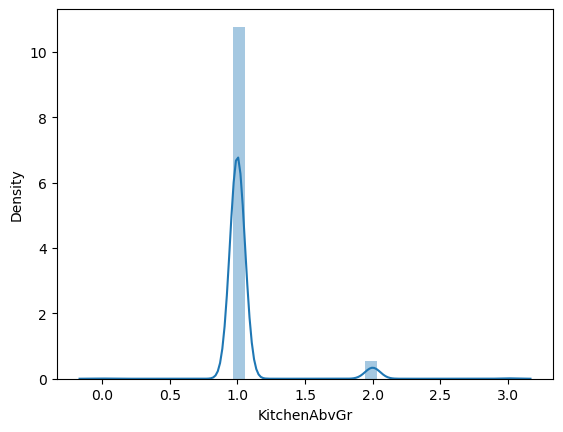

Skewness: 0.6524162029006894
count    1168.000000
mean        6.549658
std         1.634336
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


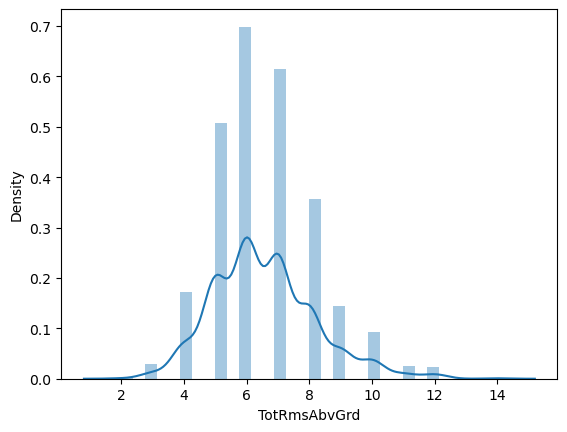

Skewness: 0.5830561836069049
count    1168.000000
mean        0.614726
std         0.636391
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


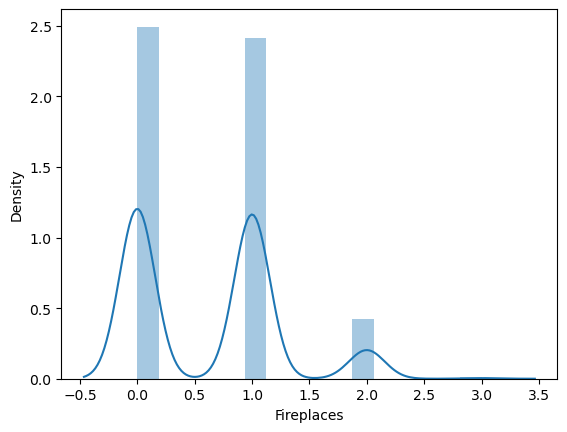

Skewness: -0.3616135551559263
count    1168.000000
mean        1.773116
std         0.752531
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


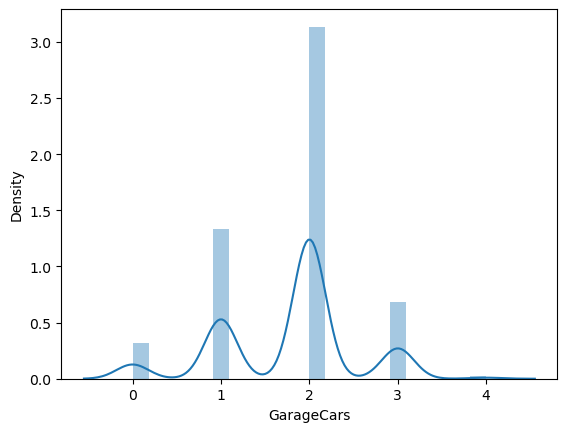

Skewness: 0.18878803980641282
count    1168.000000
mean      473.757705
std       216.084302
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


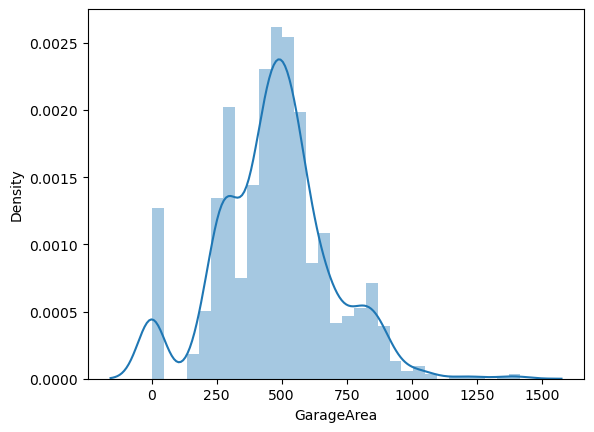

Skewness: 1.5727546647403368
count    1168.000000
mean       94.396404
std       125.868811
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


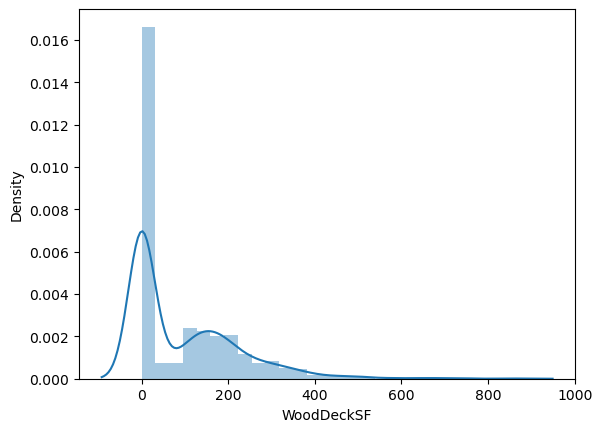

Skewness: 2.2407024465048253
count    1168.000000
mean       46.705479
std        65.580257
min         0.000000
25%         0.000000
50%        24.500000
75%        68.250000
max       523.000000
Name: OpenPorchSF, dtype: float64


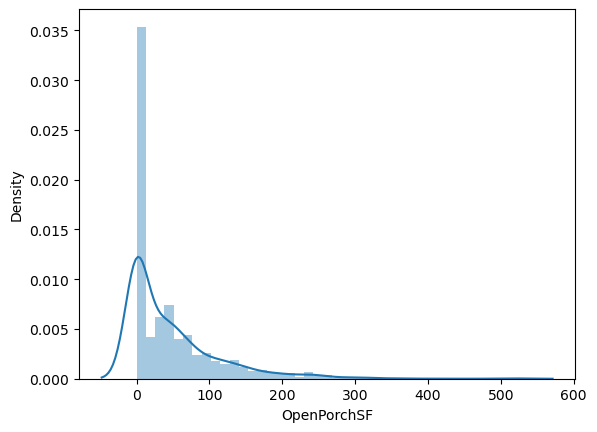

Skewness: 3.1467105194492886
count    1168.000000
mean       22.260274
std        62.275784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


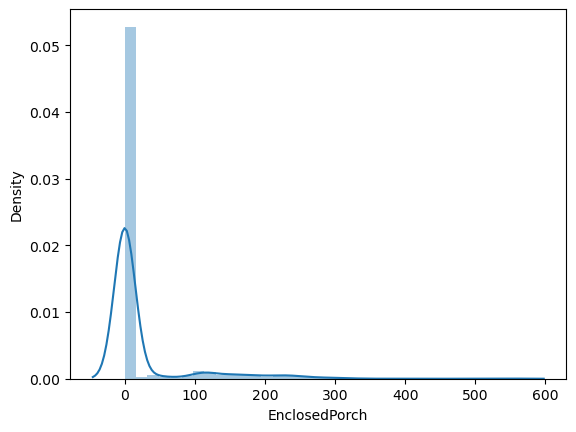

Skewness: 9.656689788584668
count    1168.000000
mean        3.953767
std        31.905139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


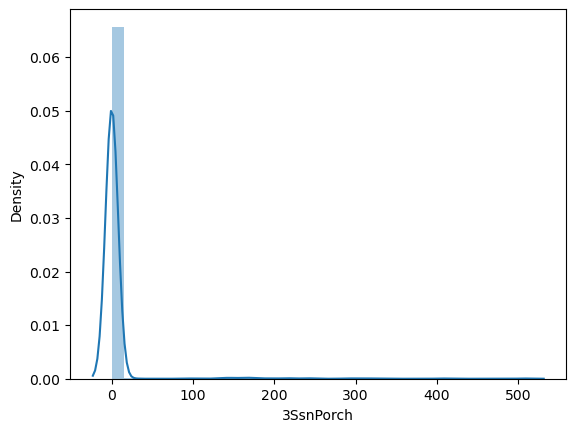

Skewness: 4.148818236004729
count    1168.000000
mean       14.710616
std        55.471186
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       440.000000
Name: ScreenPorch, dtype: float64


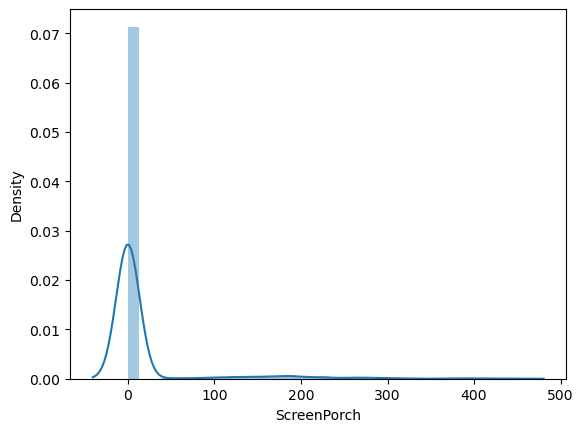

Skewness: 14.371069590694683
count    1168.000000
mean        2.893836
std        40.736249
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


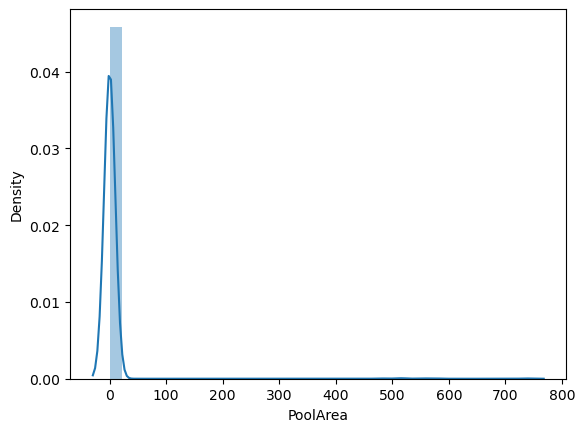

Skewness: 23.201667249229928
count     1168.000000
mean        44.815068
std        542.983929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


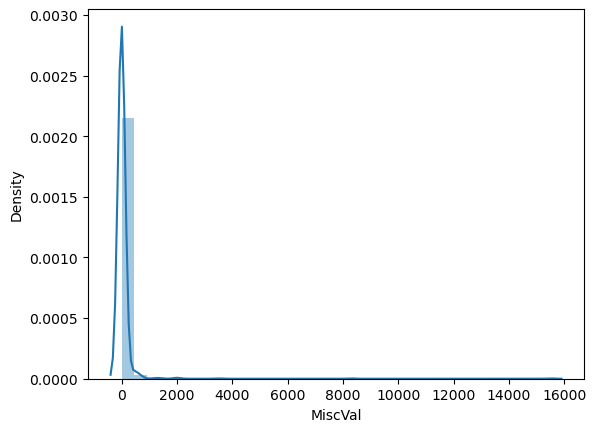

Skewness: 1.8419672630902362
count     1168.000000
mean      2571.146404
std        812.986244
min        334.000000
25%       2014.750000
50%       2484.000000
75%       3006.500000
max      11752.000000
Name: TotalSF, dtype: float64


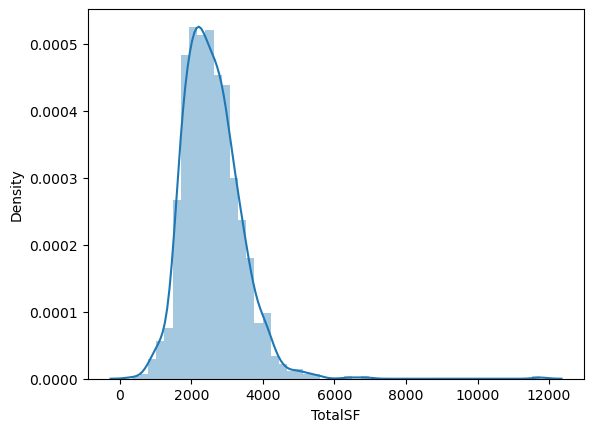

Skewness: 0.29567976497647763
count    1168.000000
mean        2.203767
std         0.791722
min         1.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.000000
Name: Total_Bathrooms, dtype: float64


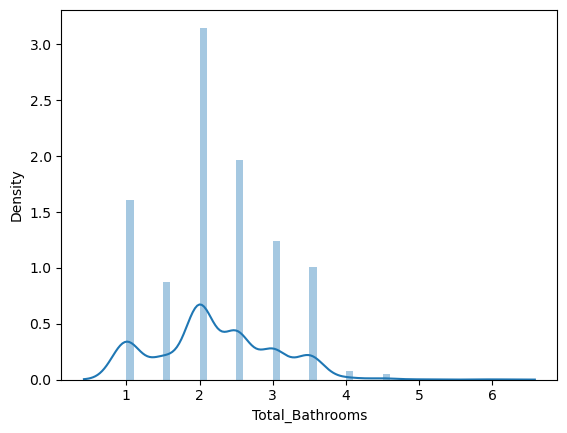

Skewness: 0.5838099251296484
count    1168.000000
mean        0.450342
std         0.520052
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


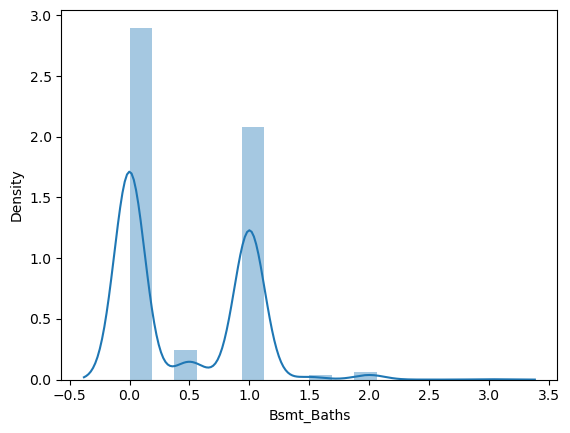

Skewness: 0.1216650011930925
count    1168.000000
mean        1.753425
std         0.638984
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


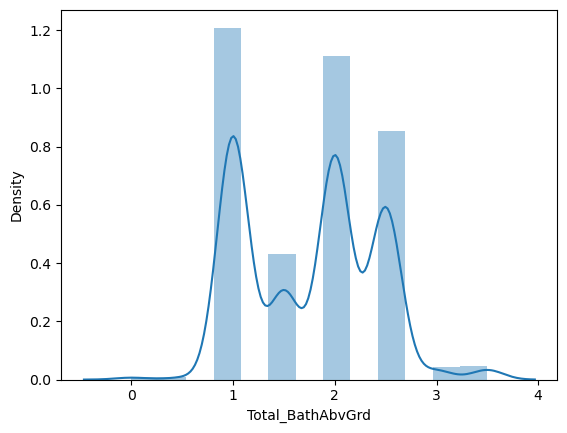

Skewness: 0.9216724827318452
count    1168.000000
mean      207.710326
std        37.706589
min       112.037037
25%       181.836124
50%       204.114583
75%       228.277027
max       434.000000
Name: AvgRoomSize, dtype: float64


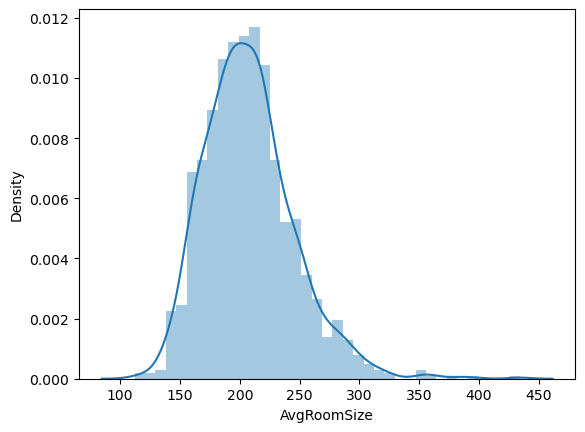

Skewness: 1.0252658853702972
count    1168.000000
mean      182.026541
std       157.283778
min         0.000000
25%        44.000000
50%       164.500000
75%       268.250000
max       929.000000
Name: Total_porch_sf, dtype: float64


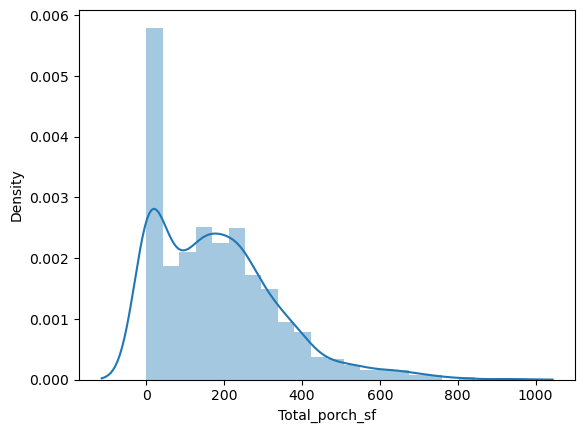

Skewness: 0.7967134745960945
count    1168.000000
mean        5.243579
std         2.822278
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


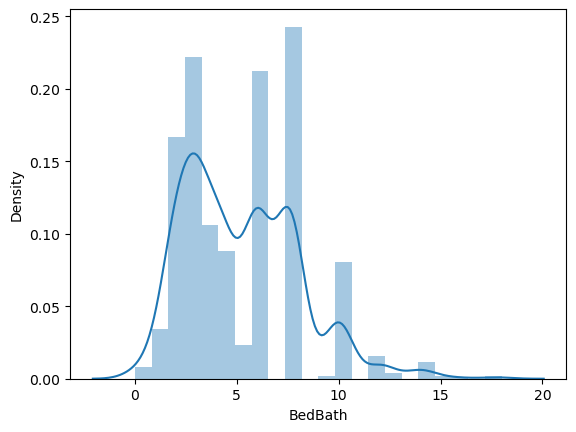

Skewness: 11.77971850192839
count      1168.000000
mean      10795.931507
std       10817.162680
min        1324.000000
25%        7630.000000
50%        9642.500000
75%       11768.250000
max      215395.000000
Name: TotalLot, dtype: float64


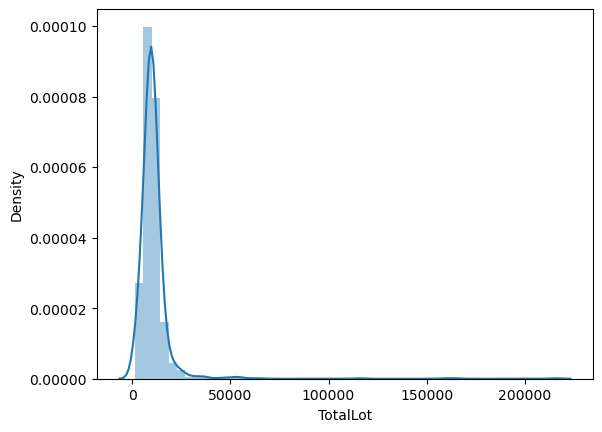

Skewness: 1.8457077303501002
count     1168.000000
mean      2577.182363
std        814.489623
min        334.000000
25%       2016.000000
50%       2485.000000
75%       3013.500000
max      11752.000000
Name: sqft_living, dtype: float64


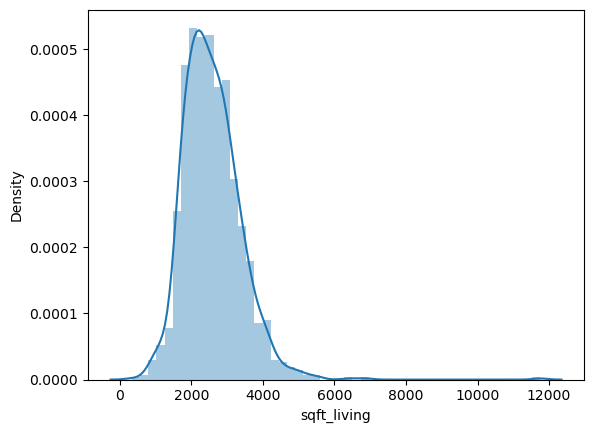

Skewness: 0.6243908725027593
count    1168.000000
mean       36.742295
std        30.542754
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


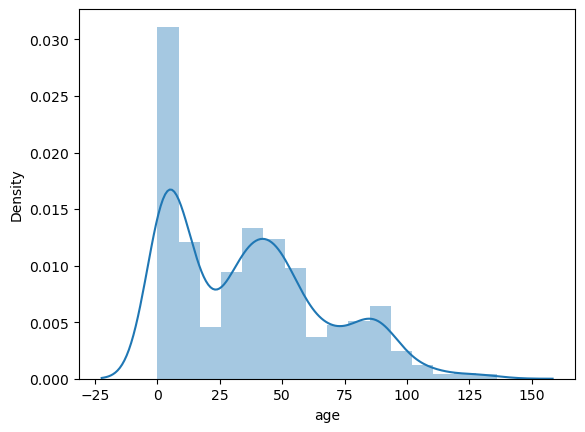

In [23]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [24]:
cat_list=[]
outlier_df = get_outliers(training,cat_list)
training=remove_outliers(training,outlier_df,cat_list)
outlier_df

Empty DataFrame
Columns: [Feature, Total Outliers, Upper limit, Lower limit]
Index: []

Skewness: 0.16781632213080494
count    1168.000000
mean        6.111301
std         1.374742
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


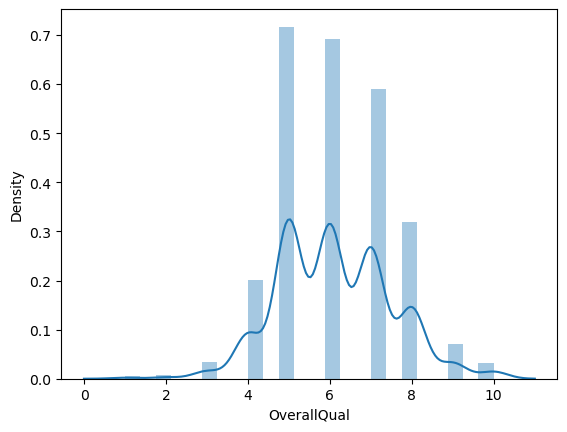

Skewness: 0.709632924338739
count    1168.000000
mean        5.583904
std         1.119959
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


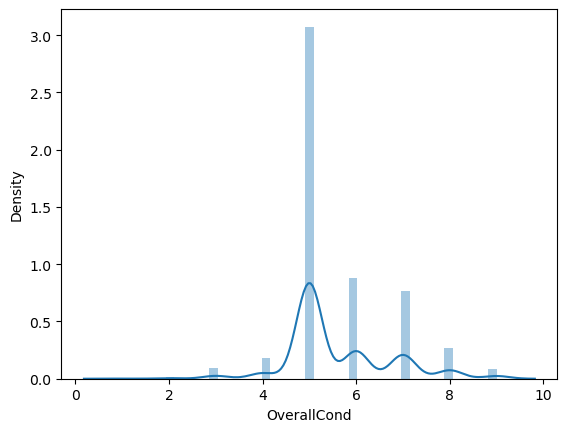

Skewness: 0.2224827223283675
count    1168.000000
mean        6.299658
std         2.666418
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


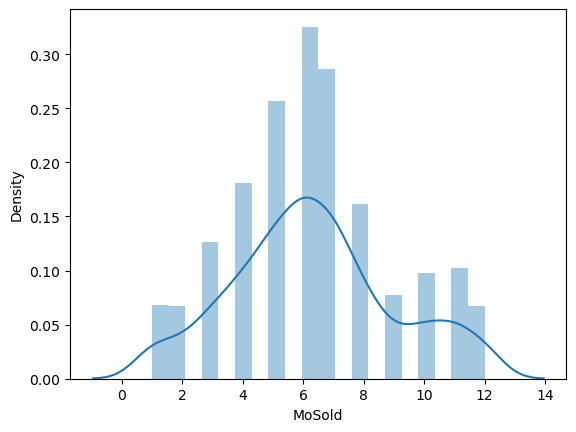

Skewness: -0.5851472189337553
count    1168.000000
mean        1.926370
std         1.411687
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


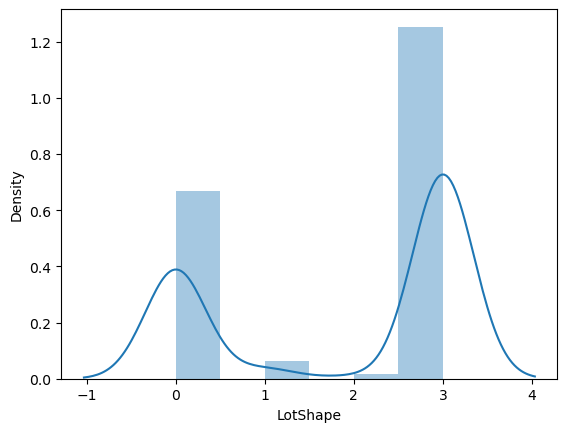

Skewness: -3.0609283844200283
count    1168.000000
mean        2.766267
std         0.721319
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


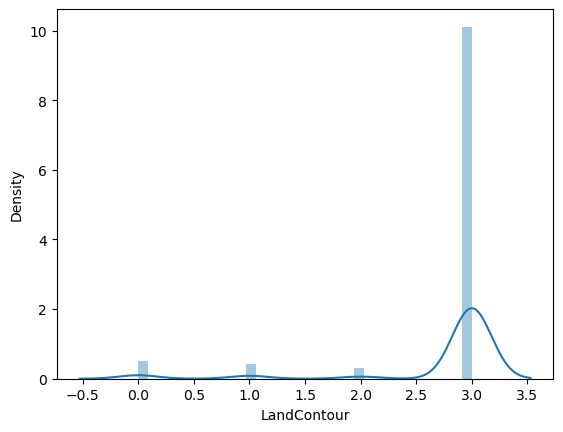

Skewness: 4.777938371393661
count    1168.000000
mean        0.065925
std         0.289673
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


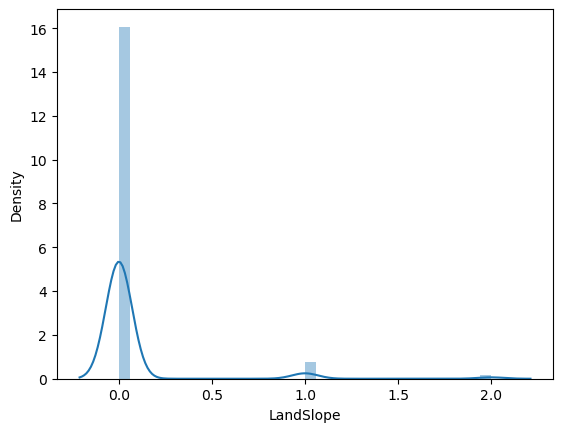

Skewness: -1.767928010896546
count    1168.00000
mean        2.52911
std         0.69087
min         0.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         3.00000
Name: ExterQual, dtype: float64


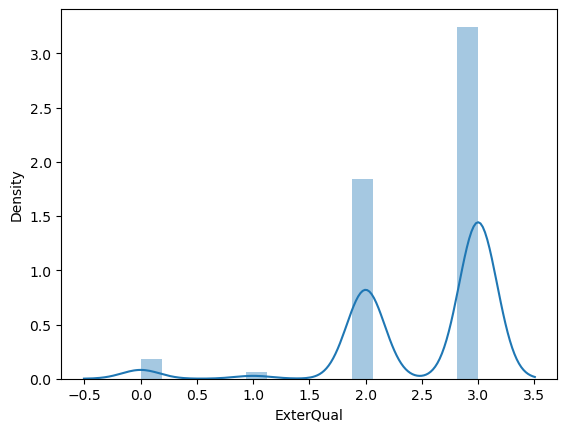

Skewness: -2.4987885429383754
count    1168.000000
mean        3.725171
std         0.741001
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


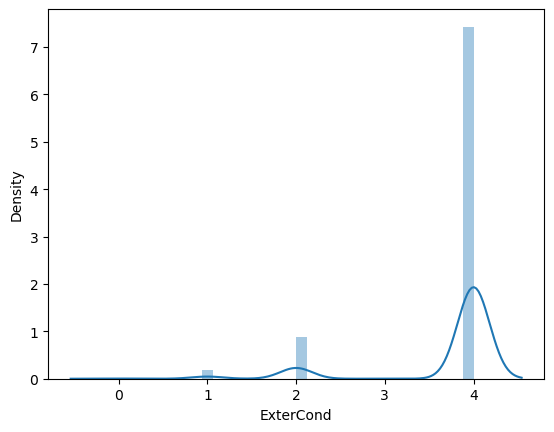

Skewness: -0.4932239330390275
count    1168.000000
mean        2.738870
std         1.262251
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


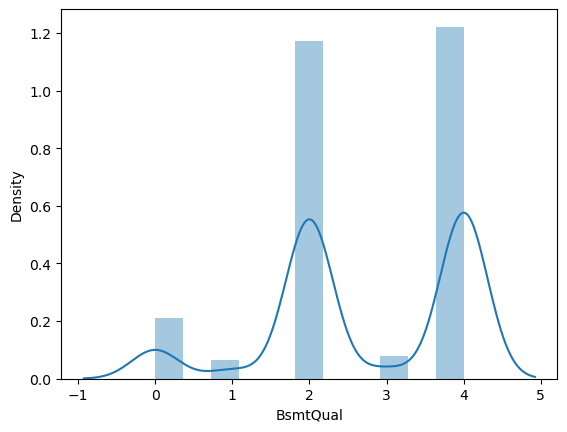

Skewness: -2.9070836360757513
count    1168.000000
mean        3.684075
std         0.959516
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


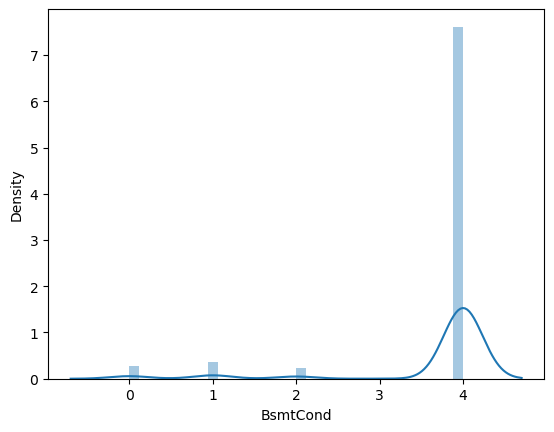

Skewness: -0.9332509664402949
count    1168.000000
mean        2.897260
std         1.586055
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


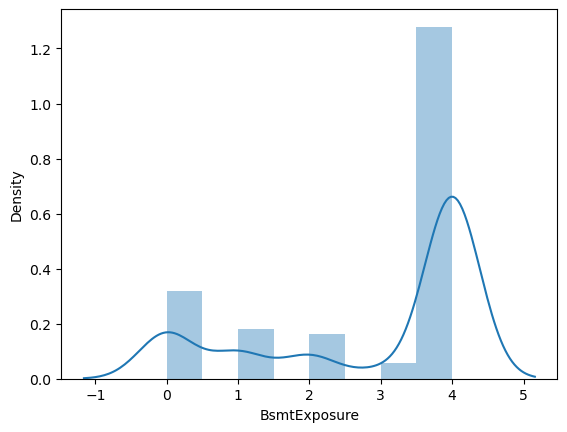

Skewness: 0.11516703926895566
count    1168.000000
mean        3.158390
std         2.231983
min         0.000000
25%         2.000000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


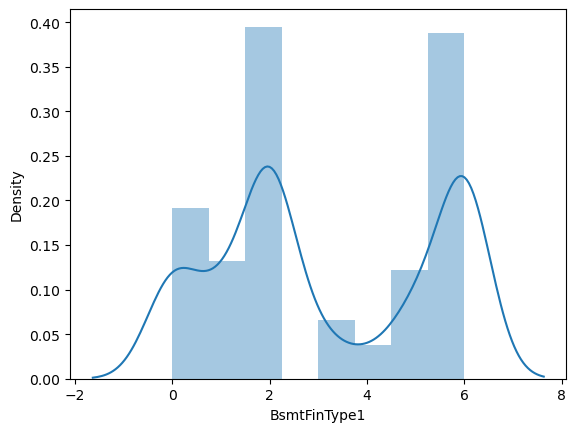

Skewness: -3.3298086542556797
count    1168.000000
mean        5.608733
std         1.165114
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: BsmtFinType2, dtype: float64


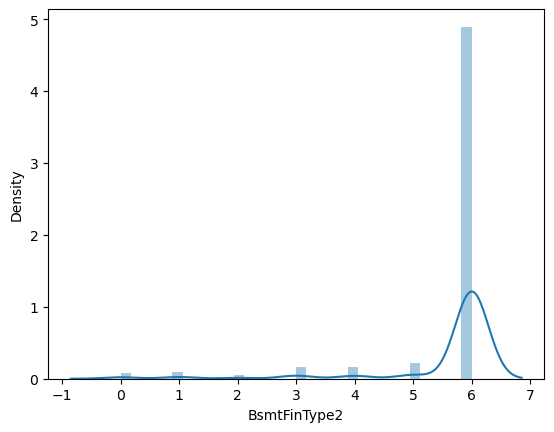

Skewness: 0.5105338295536095
count    1168.000000
mean        1.512842
std         1.739162
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


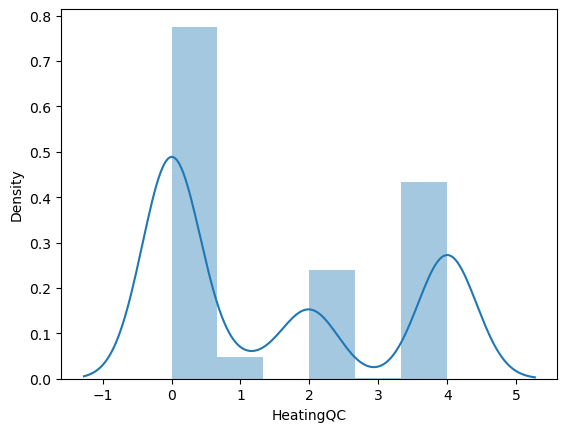

Skewness: -1.40387601930071
count    1168.000000
mean        2.338185
std         0.820379
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: KitchenQual, dtype: float64


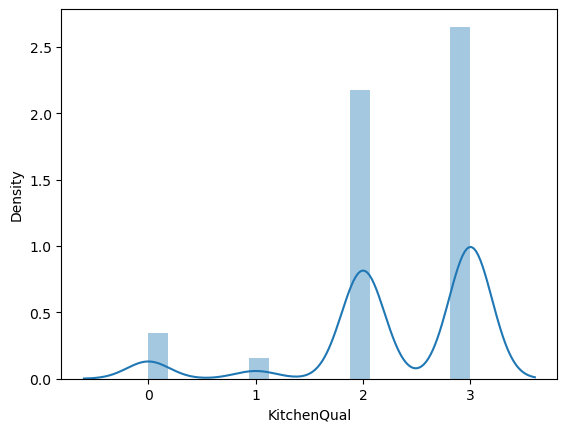

Skewness: -4.11887907853554
count    1168.000000
mean        5.760274
std         0.947136
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


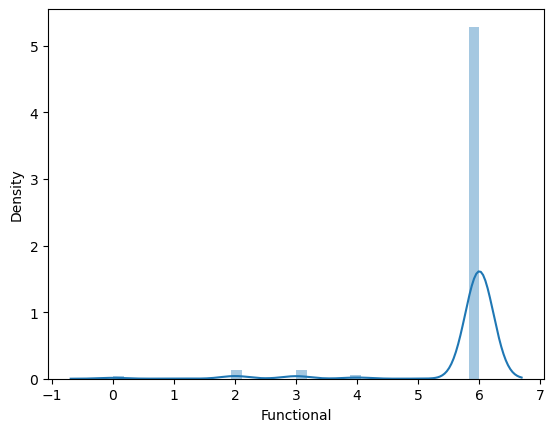

Skewness: 0.3515550980650846
count    1168.000000
mean        3.113014
std         1.161022
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


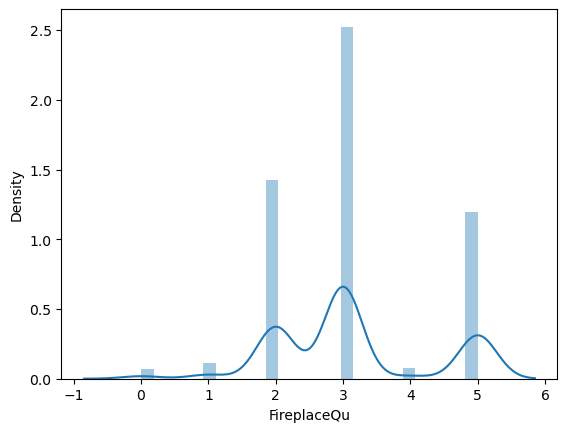

Skewness: -0.598616551528245
count    1168.000000
mean        1.865582
std         1.195499
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


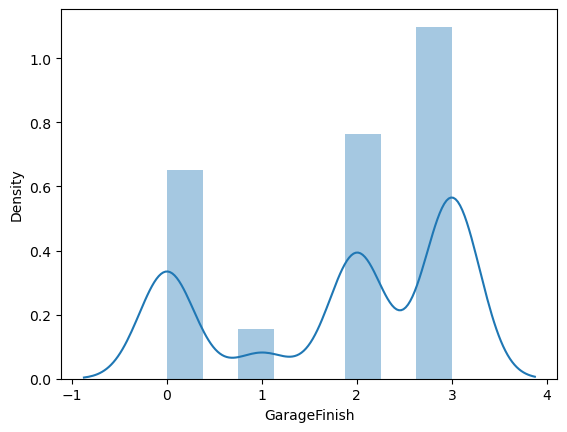

Skewness: -3.2848727986878914
count    1168.000000
mean        4.720034
std         0.889552
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


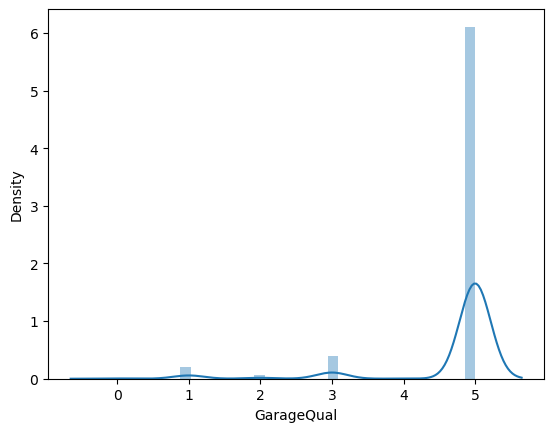

Skewness: -3.5041617303980965
count    1168.000000
mean        4.752568
std         0.819374
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


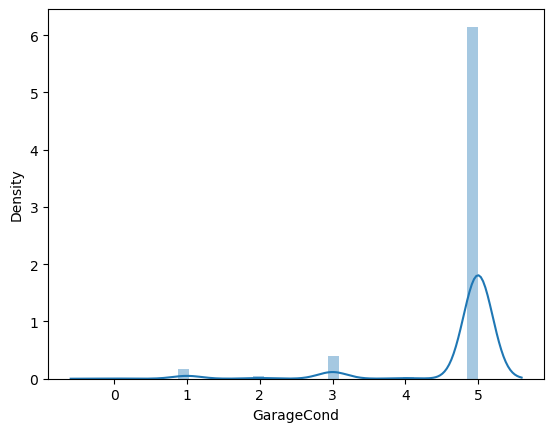

Skewness: -3.0920202848468086
count    1168.000000
mean        1.839897
std         0.522879
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


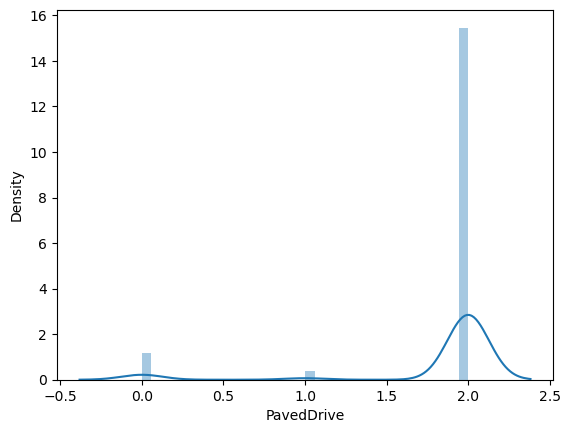

Skewness: -17.71153259484384
count    1168.000000
mean        2.990582
std         0.146061
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


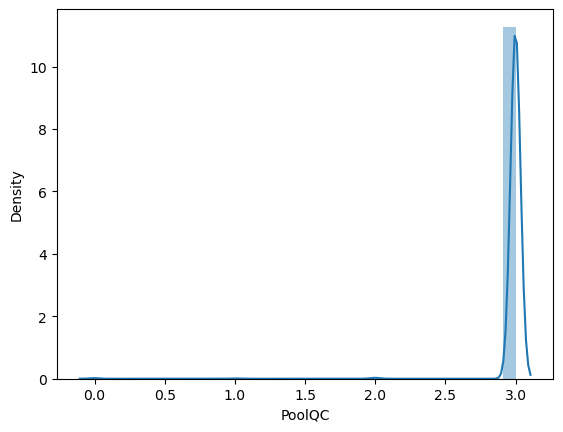

In [25]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [26]:
x_train=training.loc[:,training.columns!='SalePrice']
y_train=training['SalePrice']
x_valid=validation.loc[:,validation.columns!='SalePrice']
y_valid=validation['SalePrice']

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train, np.log(y_train/100000))
y_pred=regressor.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission.csv', index=False)

Mean Absolute Error: 0.0851677298678322
Mean Squared Error: 0.021112338467581832
Root Mean Squared Error: 0.14530085501325116
R-squared Error: 0.8744678609254687
[0.24160485 0.57184946 0.62731518 ... 0.52542122 0.16623883 0.81090248]


In [28]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(random_state=42)
rand.fit(x_train, np.log(y_train/100000))
rand.feature_importances_

array([4.52993204e-03, 4.80436538e-03, 1.58450256e-03, 8.03853744e-04,
       3.58411283e-04, 3.91324738e-01, 1.02488180e-02, 1.97961500e-03,
       3.16340095e-03, 6.91949400e-04, 5.09978958e-03, 7.60677148e-04,
       1.39818069e-03, 2.34390904e-03, 9.12068464e-03, 6.62966664e-04,
       0.00000000e+00, 7.32283633e-03, 4.64952578e-03, 1.00961135e-03,
       1.56245979e-02, 8.37313063e-03, 3.87188031e-03, 0.00000000e+00,
       1.13503340e-02, 2.27742024e-04, 9.78769621e-05, 3.02786697e-04,
       5.59809612e-04, 7.31988165e-04, 2.85665666e-03, 4.17809422e-03,
       1.70848127e-03, 1.57247545e-03, 3.12815821e-03, 1.20071969e-03,
       1.71440164e-03, 1.37972990e-02, 1.25404503e-02, 2.36457753e-03,
       1.02481716e-03, 2.17401254e-03, 2.03560959e-03, 2.57742407e-03,
       2.51932140e-03, 8.82518616e-05, 3.92352377e-04, 1.20058898e-04,
       1.36197959e-04, 9.49551329e-05, 2.87474117e-03, 2.92249035e-01,
       1.26316770e-02, 7.68615566e-04, 1.75139641e-03, 4.71881529e-03,
      

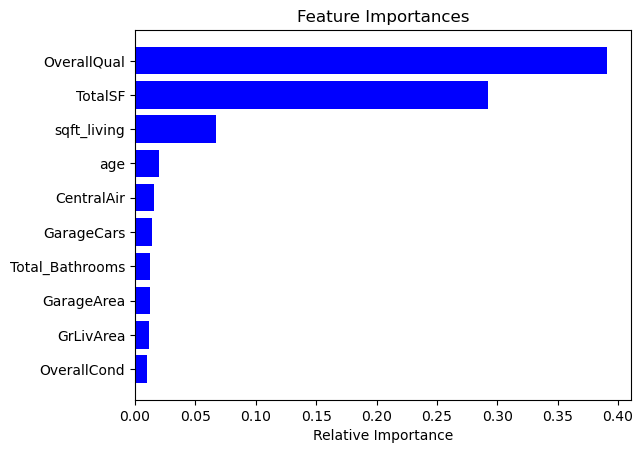

In [29]:
features = training.loc[:,training.columns!='SalePrice'].columns
importances = rand.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
regressor = LinearRegression()
regressor.fit(x_train[[features[i] for i in indices]], np.log(y_train/100000))
y_pred=regressor.predict(x_valid[[features[i] for i in indices]])
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data[[features[i] for i in indices]])
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission_improved.csv', index=False)

Mean Absolute Error: 0.10798470298882708
Mean Squared Error: 0.026900616041690733
Root Mean Squared Error: 0.16401407269405494
R-squared Error: 0.8400512629464835
[0.10303641 0.38365331 0.51794248 ... 0.43849995 0.10859479 0.85426461]


In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, np.log(y_train/100000))
y_pred=lasso_reg.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=lasso_reg.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('lasso_submission.csv', index=False)

Mean Absolute Error: 0.08216743562716085
Mean Squared Error: 0.018049167300507606
Root Mean Squared Error: 0.13434718940308207
R-squared Error: 0.8926812118313714
[0.13850832 0.3813169  0.57593636 ... 0.49497718 0.19649123 0.87693485]


In [32]:
selected_features = x_train.columns[lasso_reg.coef_ != 0]
selected_features

Index(['LotArea', 'LotShape', 'LandContour', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TotalSF',
       'Total_Bathrooms', 'Total_BathAbvGrd', 'AvgRoomSize', 'Total_porch_sf',
       'BedBath', 'TotalLot', 'sqft_living', 'age', 'MSSubClass_20',
       'MSSubClass_30', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NWAmes', 

In [33]:
x_train.shape

(1168, 246)

In [34]:
len(selected_features)

83

In [35]:
from sklearn.linear_model import Ridge
alpha = 0.001  # Regularization strength
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, np.log(y_train/100000))

y_pred=ridge.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=ridge.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('ridge_submission.csv', index=False)

Mean Absolute Error: 0.08511712343565057
Mean Squared Error: 0.021090138439373816
Root Mean Squared Error: 0.14522444160462045
R-squared Error: 0.874599860373694
[0.24152688 0.56875207 0.62726934 ... 0.52518957 0.16630639 0.81100578]
